# Moedas a serem analisadas

## ANO DE LANÇAMENTO

- **Bitcoin (BTC)**: 2009
- **Binance Coin (BNB)**: 2017
- **Ethereum (ETH)**: 2015
- **Solana (SOL)**: 2020
- **Avalanche (AVAX)**: 2020
- **Cardano (ADA)**: 2017
- **XRP (XRP)**: 2012
- **Render Token (RNDR)**: 2017
- **The Graph (GRT)**: 2020
- **SingularityNET (AGIX)**: 2017
- **Ocean Protocol (OCEAN)**: 2019


# Bibliotecas Usadas:

In [14]:
# Manipulação e Tratamento de dados
import openpyxl
import pandas as pd
import numpy as np
from numpy import NaN
from datetime import datetime, date

# Para ignorar Warning inuteis
import warnings 
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# definindo quantidade de linhas e colunas visiveis
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)

# Para visualização de graficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('dark_background')

# Para carregamento dos registros das moedas
import yfinance as yf

# Função para download dos dados históricos de criptomoedas

In [15]:
cryptos_nome = {} ###################################################
cryptos = [] ###################################################

def crypto_df_download(moeda, ano_inicio, nome):
    cryptos_nome[moeda] = nome
    df = yf.download(moeda, start=str(ano_inicio)+"-01-01", end=str(date.today()))
    cryptos.append(df)
    return df

################################################################################################
ano = '2015'

# Defi Famosas
BTC = crypto_df_download("BTC-USD", ano, 'Bitcoin') 
BNB = crypto_df_download("BNB-USD", ano, 'Binance Coin')
ETH = crypto_df_download("ETH-USD", ano, 'Ethereum')
SOL = crypto_df_download("SOL-USD", ano, 'Solana')
AVAX = crypto_df_download("AVAX-USD", ano, 'Avalanche')
ADA = crypto_df_download("ADA-USD", ano, 'Cardano')
XRP = crypto_df_download("XRP-USD", ano, 'XRP')

# Moedas de IA
RNDR = crypto_df_download("RNDR-USD", ano, 'Render Token')
GRT = crypto_df_download("GRT-USD", ano, 'The Graph')
AGIX = crypto_df_download("AGIX-USD", ano, 'SingularityNET')
OCEAN = crypto_df_download("OCEAN-USD", ano, 'Ocean Protocol')
INJ = crypto_df_download("INJ-USD", ano, "Injective Protocol")
KAS = crypto_df_download("KAS-USD", ano, "Kaspa")
CSPR = crypto_df_download("CSPR-USD", ano, "Casper")
PLA = crypto_df_download("PLA-USD", ano, "Planet")
LMWR = crypto_df_download("LMWR-USD", ano, "Limewire")
INSP = crypto_df_download("INSP-USD", ano, "Inspect") 
BCH = crypto_df_download("BCH-USD", ano, "Bitcoin Cash")

cryptos_nome = {k.replace('-USD', ''): v for k, v in cryptos_nome.items()}

################################################################################################

def head_tail(df):
    display(pd.concat([df.head(2), df.tail(2)]))
    
count = 0
for i in cryptos:
    #print('='*40, crypto_names[count], '='*40)
    #head_tail(i)
    
    count += 1

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

# Funções para auxiliar nas analises:

In [16]:
# Calcula o lucro ou perda percentual entre dois valores.
def lucro_perda(valor_atual, valor_anterior):
    return ((valor_atual-valor_anterior)/valor_anterior)*100
    
# Calcula a mudança percentual ao longo de um período e adiciona essa informação a uma nova coluna no DataFrame.
def mudanca_percentual(df, pular_periodo, nome_coluna):
    df[nome_coluna] = np.nan
    for i in range(len(df)):
        if i > pular_periodo-1: #definindo aonde começará a calcular
            df[nome_coluna][df.index[i]] = lucro_perda(df['Close'][df.index[i-pular_periodo]], 
                                                       df['Close'][df.index[i]])

# Aplicando calculos a cada dataframe das moeda
for i in cryptos:
    mudanca_percentual(i, 1, 'mudança')
# Verificação
BTC.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-01  320.434998  320.434998  314.002991  314.248993  314.248993   
2015-01-02  314.079010  315.838989  313.565002  315.032013  315.032013   
2015-01-03  314.846008  315.149994  281.082001  281.082001  281.082001   
2015-01-04  281.145996  287.230011  257.612000  264.195007  264.195007   
2015-01-05  265.084015  278.341003  265.084015  274.473999  274.473999   

              Volume    mudança  
Date                             
2015-01-01   8036550        NaN  
2015-01-02   7860650  -0.248553  
2015-01-03  33054400  12.078330  
2015-01-04  55629100   6.391867  
2015-01-05  43962800  -3.744978

In [17]:
data = '2024-02-11'
data = datetime.strptime(data, '%Y-%m-%d')
data2 = '2024-02-04'
data2 = datetime.strptime(data2, '%Y-%m-%d')
data2 = '2024-02-04'
data2 = datetime.strptime(data2, '%Y-%m-%d')

for df, nome in zip(cryptos, cryptos_nome.values()):
    try:
        print("="*20, nome, "="*20)
        
        valor_atual = df.tail(1)['Close'][0] # ULTIMA DATA
        mundanca_7d = lucro_perda(valor_atual, df.loc[data]['Close'])
        print(mundanca_7d)
        mundanca_14d = lucro_perda(valor_atual, df.loc[data2]['Close'])
        print(mundanca_14d)
    except:
        pass

==================== Bitcoin ====================
16.027687880922507
31.586667286770677
==================== Binance Coin ====================
50.97962568089284
58.93322226594104
==================== Ethereum ====================
-1.9479683057428925
7.38913845101627
==================== Solana ====================
34.04342572142816
50.91637156558436
==================== Avalanche ====================
-47.45532076190506
-40.08552937103956
==================== Cardano ====================
-38.9036075114553
-33.074762252103305
==================== XRP ====================
-3.8752354489036933
0.47866054159924515
==================== Render Token ====================
54.951104711042
54.20981414692356
==================== The Graph ====================
==================== SingularityNET ====================
74.46852518747194
89.23076607199842
==================== Ocean Protocol ====================
-23.211542198393367
-9.666667886216043
==================== Injective Protocol ==============

# Analise da Variabilidade Diária da Moeda:

Quantificando a variabilidade diária das criptomoedas, auxiliando investidores a avaliarem risco e retorno potencial. A análise detalhada permite identificar moedas com maior variabilidade, que podem oferecer maiores rendimentos, mas também envolvem maiores riscos. Utilizando histogramas e estatísticas descritivas, o projeto proporciona uma visão clara do comportamento histórico das criptomoedas, facilitando decisões de investimento informadas.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== BTC ==================================================


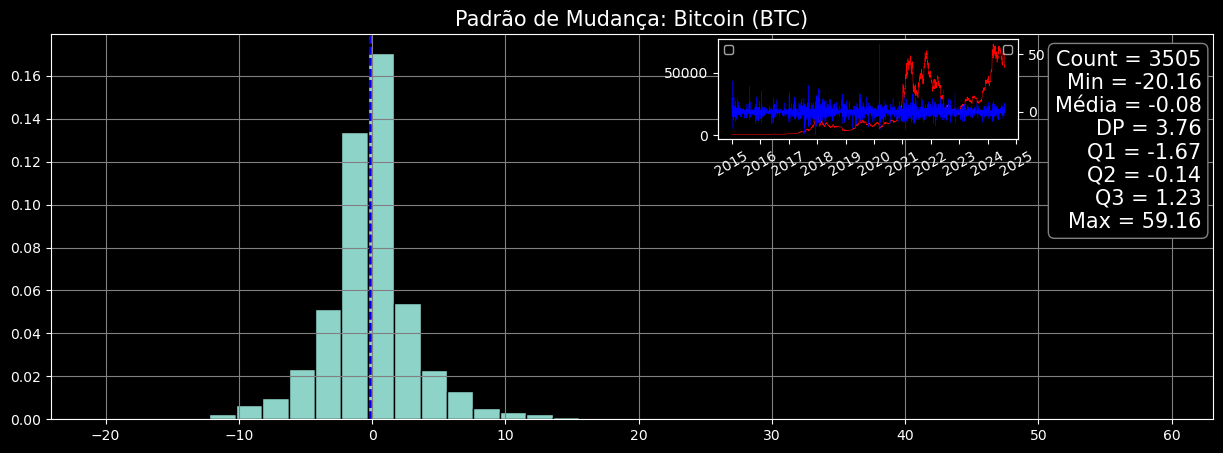

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== BNB ==================================================


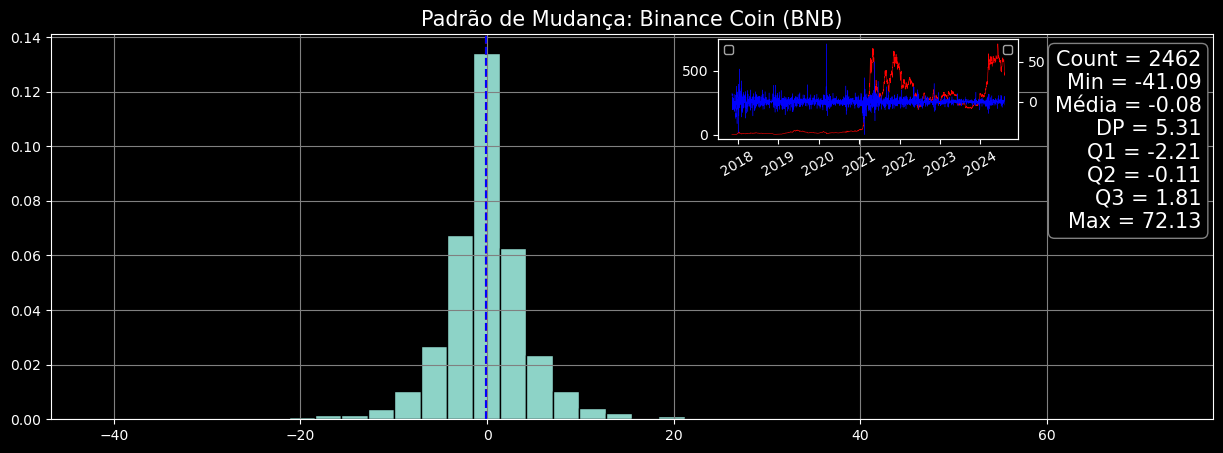

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== ETH ==================================================


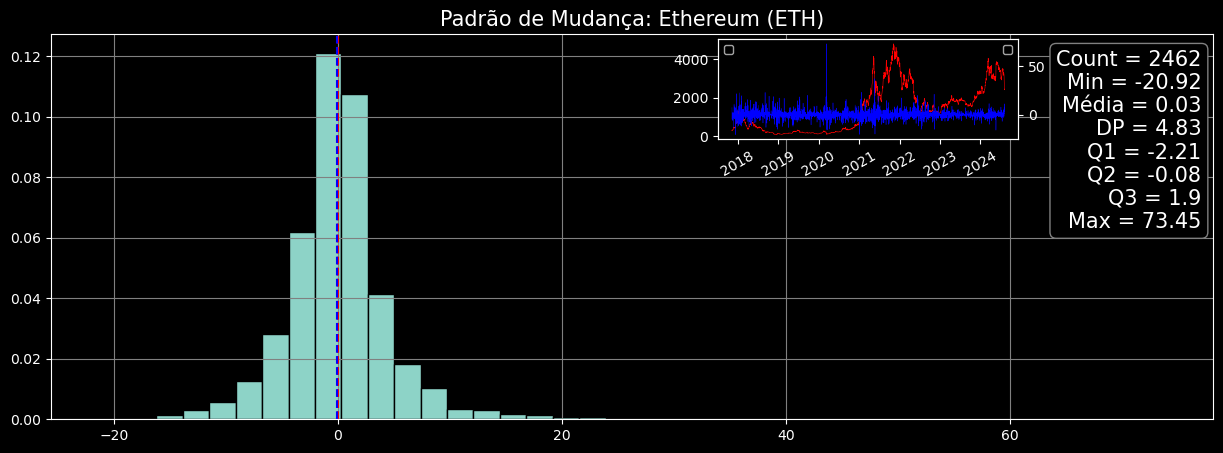

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== SOL ==================================================


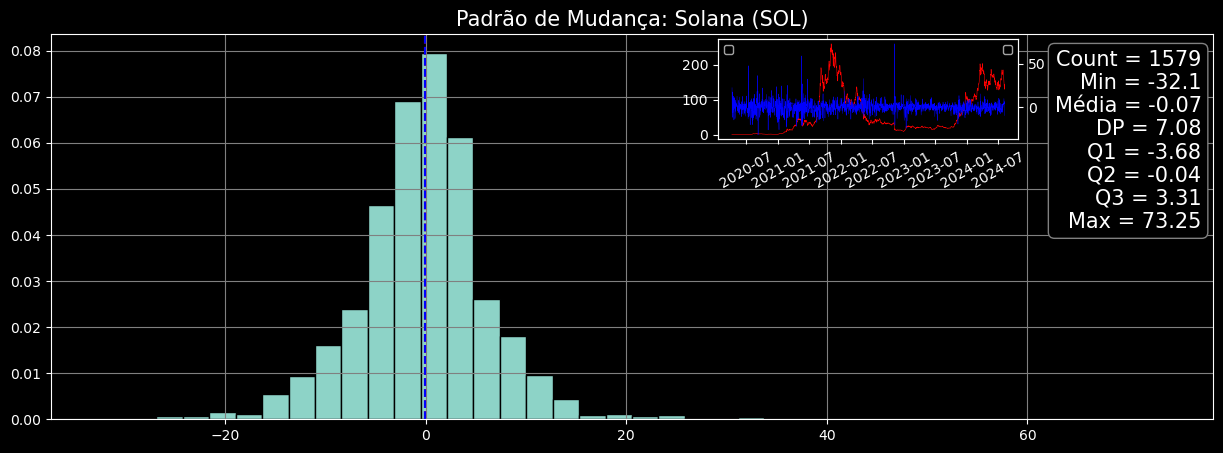

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== AVAX ==================================================


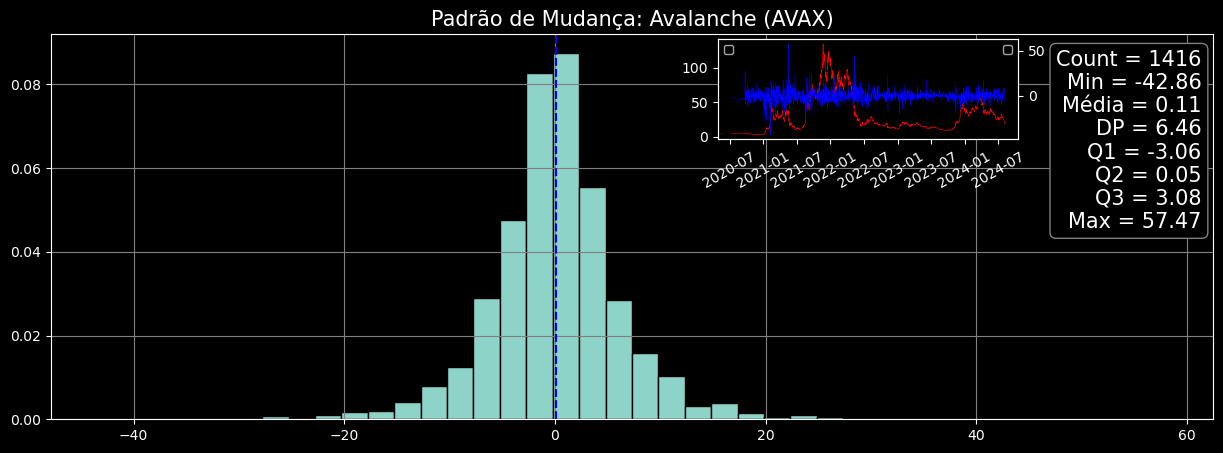

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== ADA ==================================================


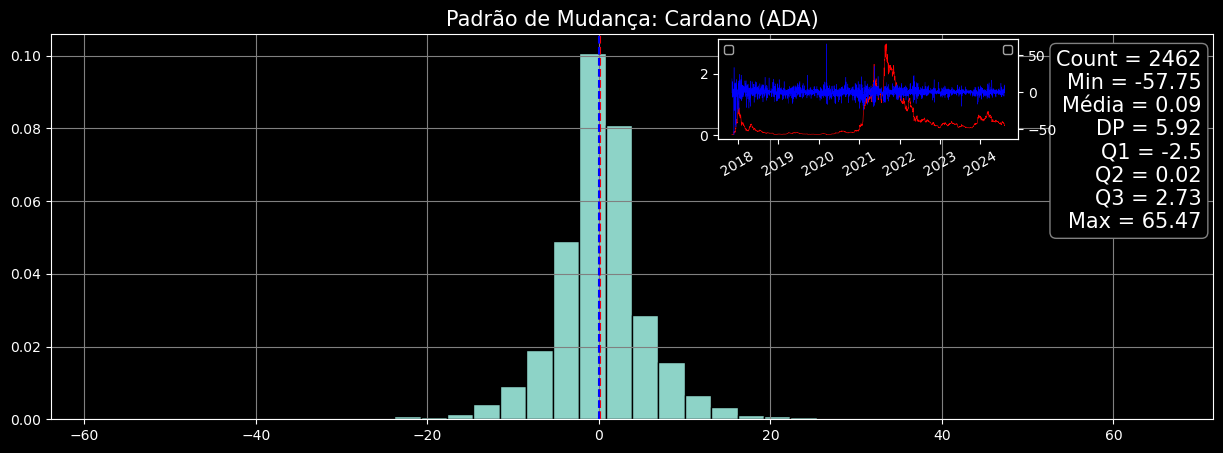

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== XRP ==================================================


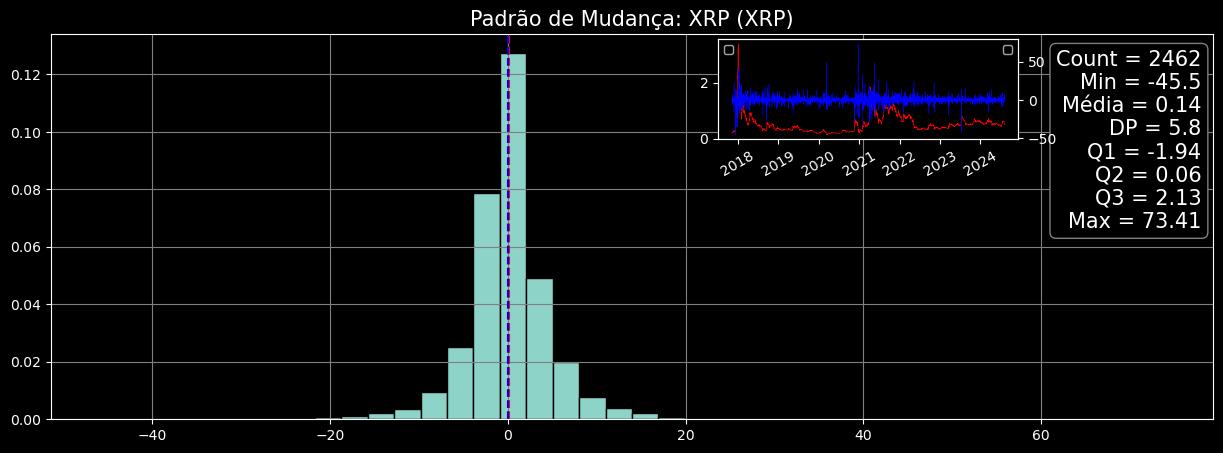

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== RNDR ==================================================


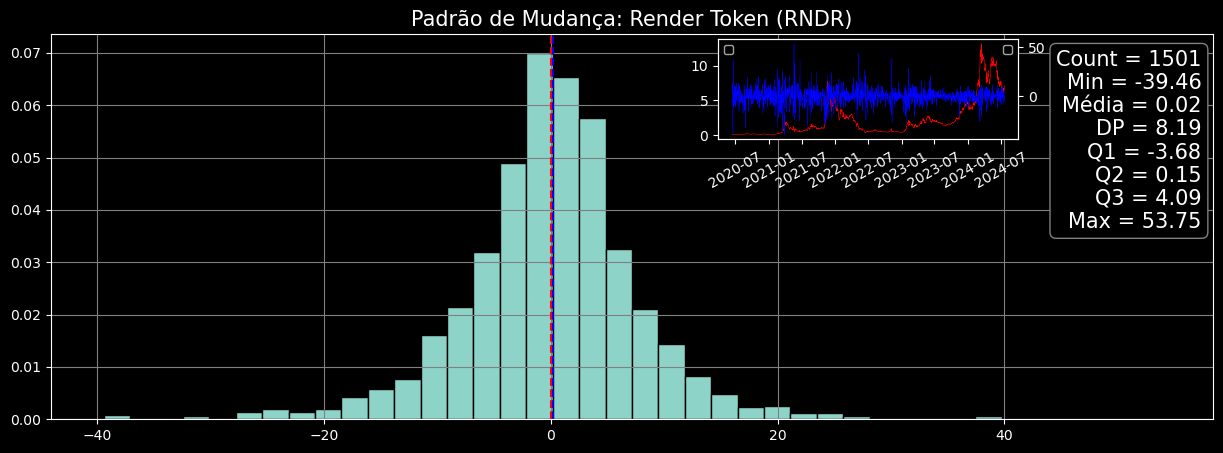

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== GRT ==================================================


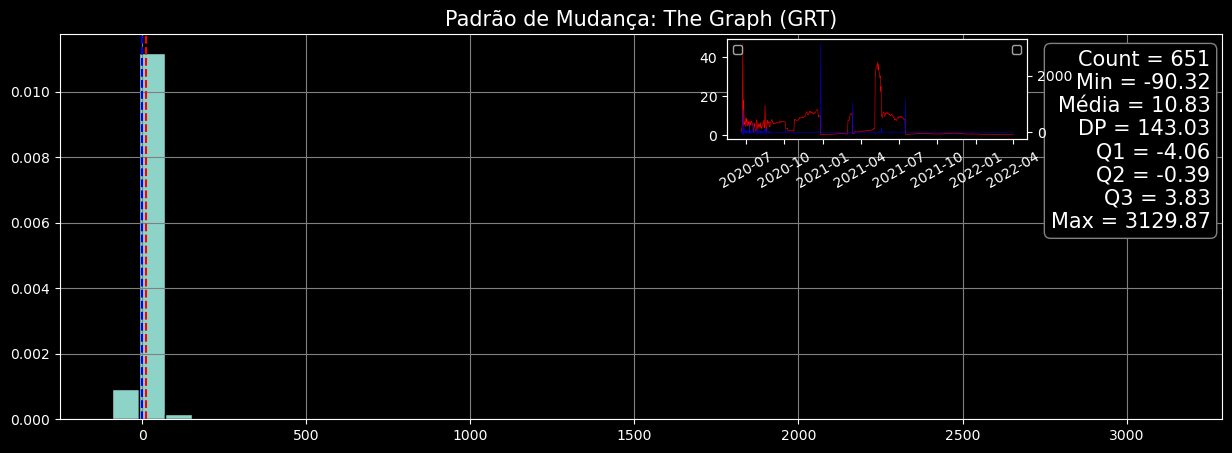

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== AGIX ==================================================


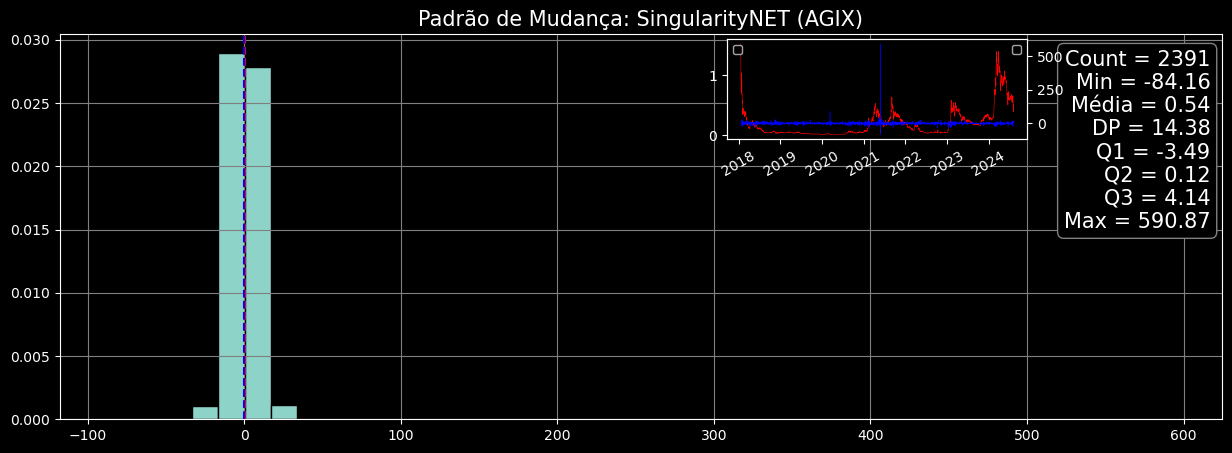

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== OCEAN ==================================================


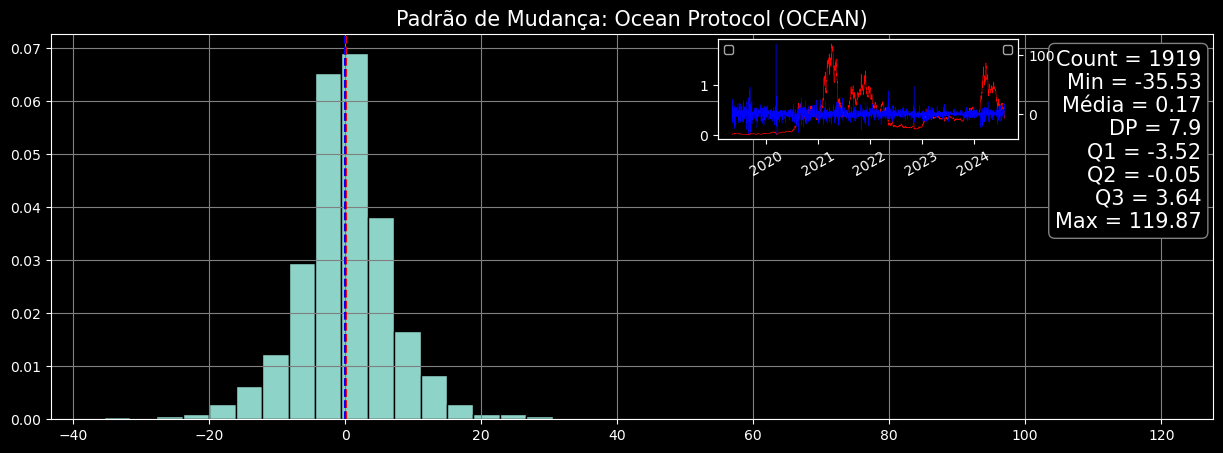

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== INJ ==================================================


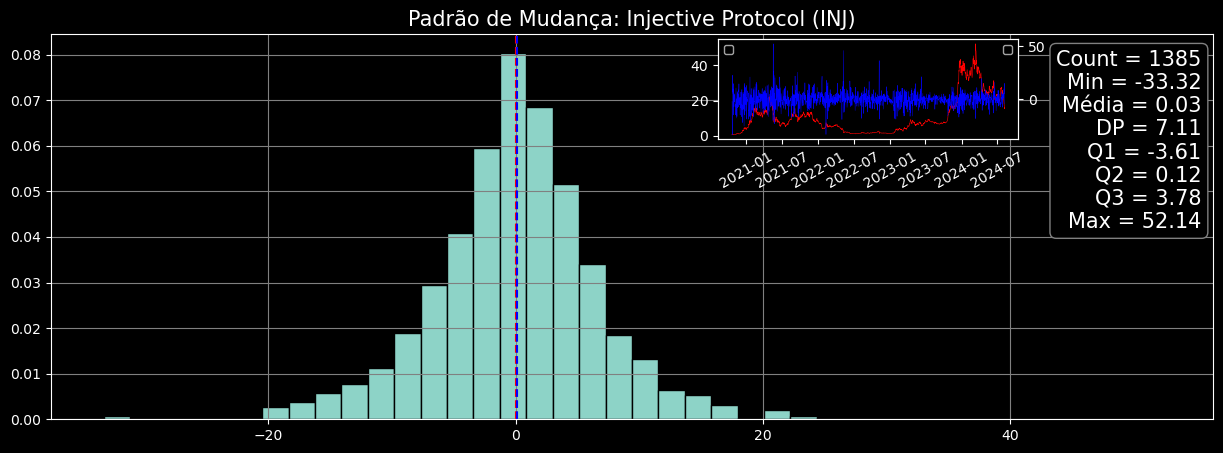

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== KAS ==================================================


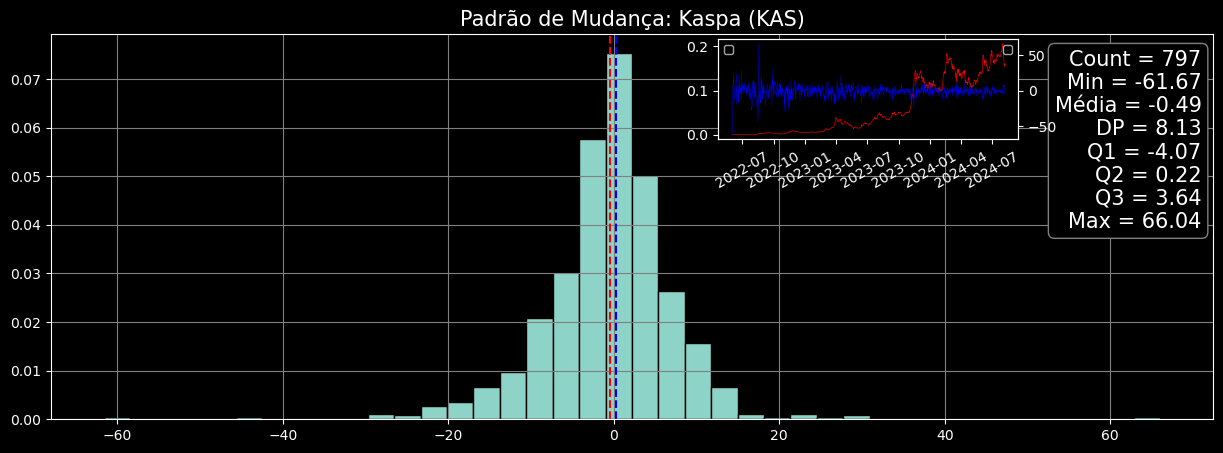

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== CSPR ==================================================


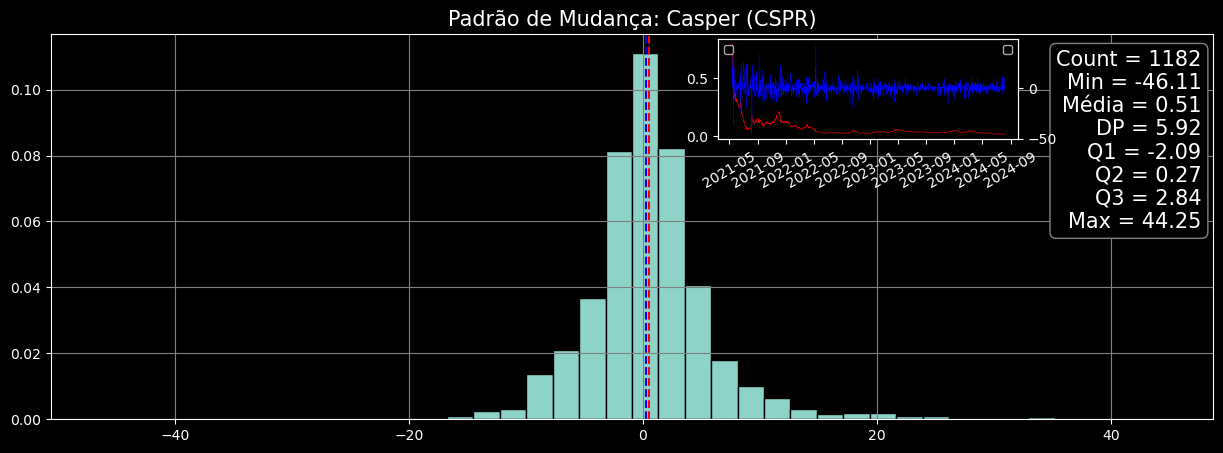

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== PLA ==================================================


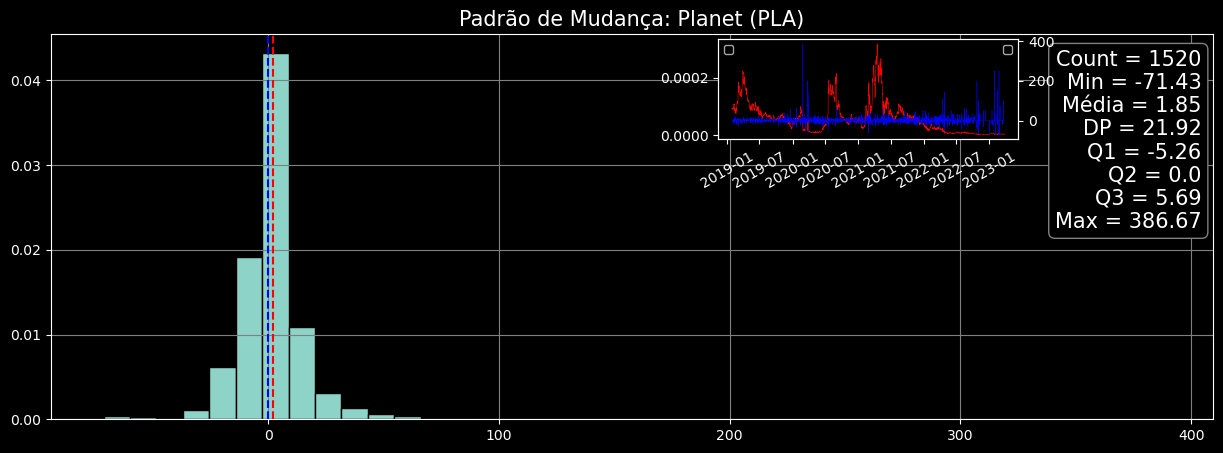

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== LMWR ==================================================


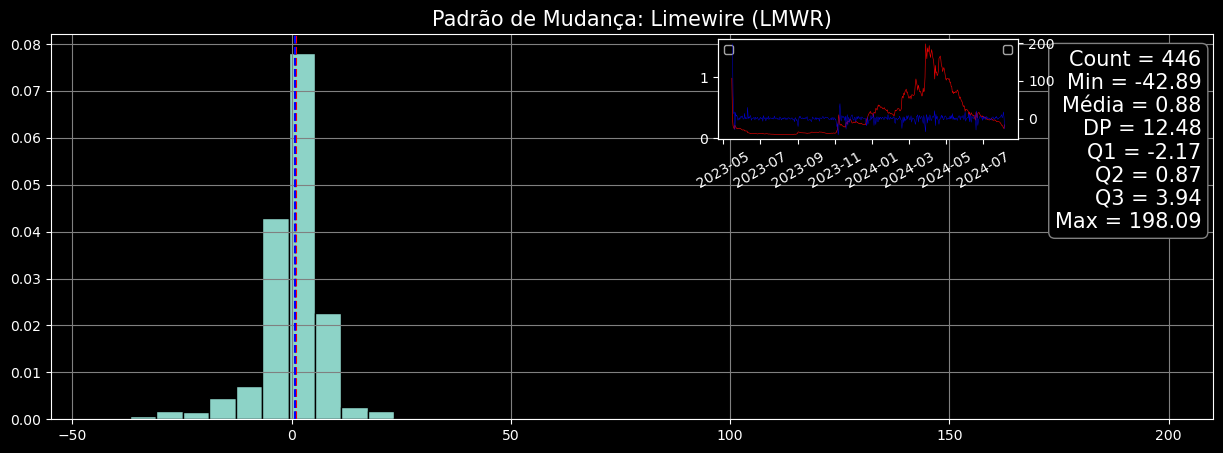

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== INSP ==================================================


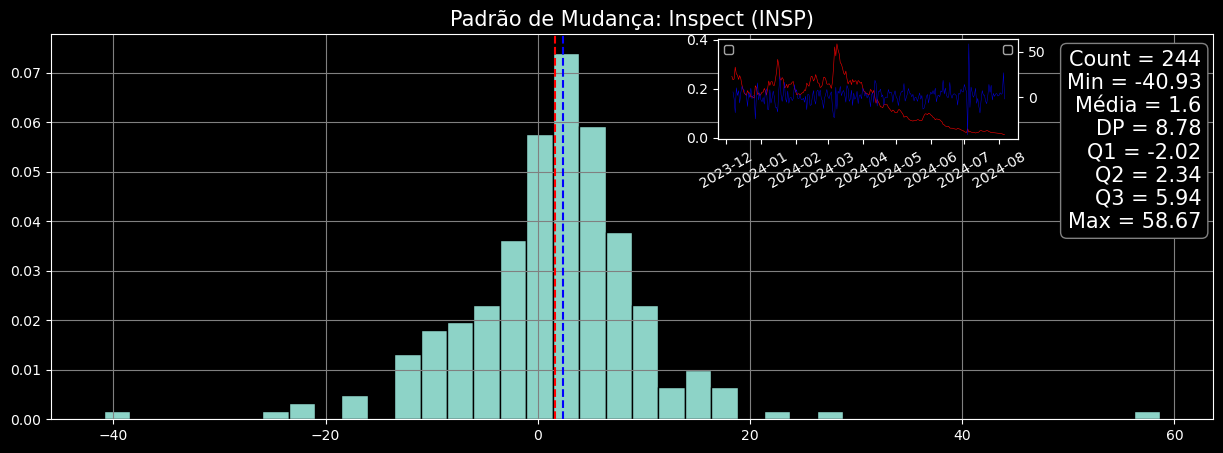

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


================================================== BCH ==================================================


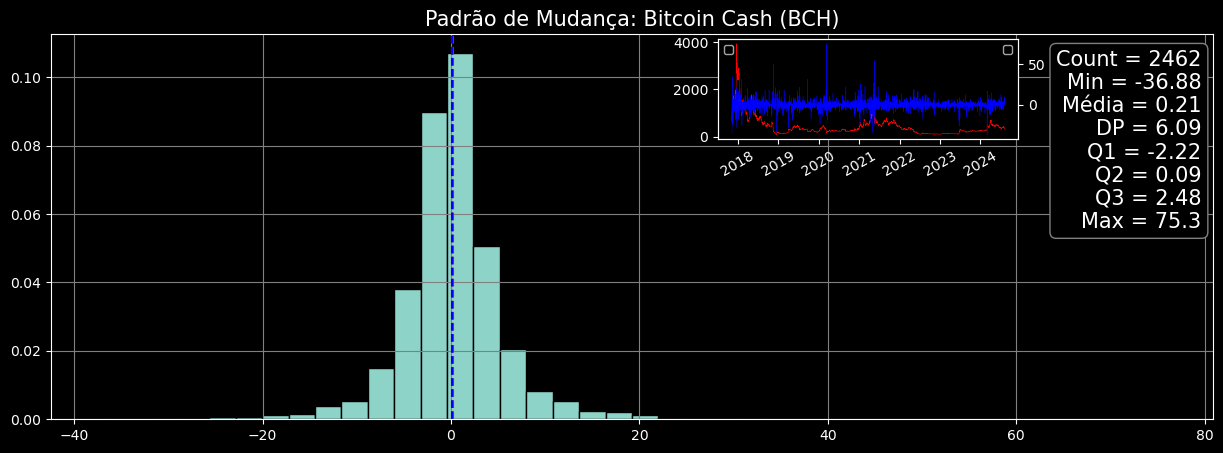

In [18]:
# Calcula o montante final de um investimento baseado no lucro percentual e converte o valor final para reais.
def calculo(valor_investido, df, inicio, fim):
    if pd.isna(inicio) or pd.isna(fim) or len(df) == 0 or df.empty:
        pass
    else:
        lucro = lucro_perda(fim, inicio)/100
        lucro = round(lucro, 2)
        montante = valor_investido + lucro*valor_investido
        montante = round(montante, 2)
        montante_em_real = 4.90*montante
        montante_em_real = round(montante_em_real, 2)
        return print(lucro, montante)
    
###############################################
# Gera um histograma para visualizar as mudanças percentuais ao longo do tempo.
def hist_mudanca(df, nome_moeda, coluna):
    if df[coluna].isna().all():
        pass
    else:
        plt.figure(figsize=(15,5))
        plt.hist(df[coluna], edgecolor='black', bins=40, density=True)

        plt.title('Padrão de Mudança: '+ nome_moeda, fontsize=15)
        plt.grid(True, color='gray')

        # Adicionar linhas verticais para média e mediana
        plt.axvline(x = df[coluna].mean(), color='red', linestyle='--', label='Média')
        plt.axvline(x = df[coluna].median(), color='blue', linestyle='--', label='Mediana')

        # Adicionar legenda personalizada
        texto_count = 'Count = ' + str(round(len(df.dropna(subset=[coluna])), 2))
        texto_media = 'Média = '+ str(round(df[coluna].mean(), 2))
        texto_dp = 'DP = '+ str(round(df[coluna].std(), 2))
        texto_min = 'Min = '+ str(round(df[coluna].min(), 2))
        texto_Q1 = 'Q1 = ' + str(round(df[coluna].quantile(0.25), 2))
        texto_mediana = 'Q2 = '+ str(round(df[coluna].median(), 2))
        texto_Q3 = 'Q3 = ' + str(round(df[coluna].quantile(0.75), 2))
        texto_max = 'Max = '+ str(round(df[coluna].max(), 2))
        texto_legenda = '\n'.join([texto_count, 
                                   texto_min,
                                   texto_media, texto_dp, 
                                   texto_Q1, texto_mediana, texto_Q3,
                                   texto_max])

        plt.text(0.99, 0.96, texto_legenda, ha='right', va='top', transform=plt.gca().transAxes,
                 bbox=dict(facecolor='black', edgecolor='gray', boxstyle='round'),
                 fontsize=15)

        #GRAFICOS MENORES############################################################################
        line_axes = plt.axes([0.57, 0.67, 0.2, 0.2])
        line_axes.plot(df.index, df['Close'], color='red', linewidth=0.4)
        line_axes_twin = line_axes.twinx()
        
        line_axes_twin.plot(df.index, df[coluna], color='blue', linewidth=0.3)
        line_axes.legend(loc='upper left', fontsize='small')
        line_axes_twin.legend(loc='upper right', fontsize='small')
        
        line_axes.tick_params(axis='x', rotation=30)
        ################################################################################################
        
        plt.show()
        #round(pd.Series(df['mudança']).describe(), 2)
    
for df, nome in zip(cryptos, cryptos_nome.keys()):
    print('='*50, nome, '='*50)
    hist_mudanca(df, cryptos_nome[nome] + " (" + nome + ")", 'mudança')

## Variabilidade entre o periodo de Halving 2016 á 2020

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============================================= BTC =============================================


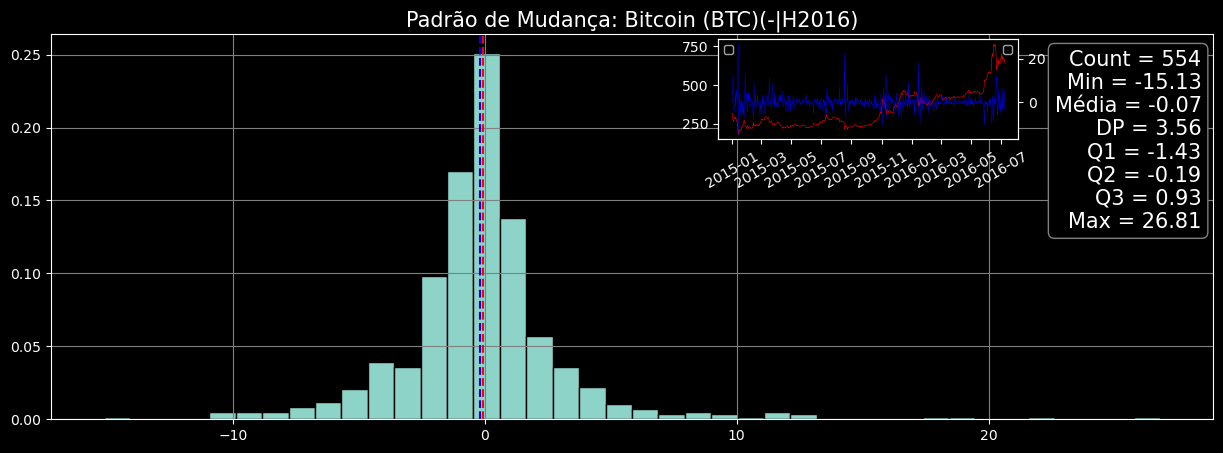

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.44 244.0


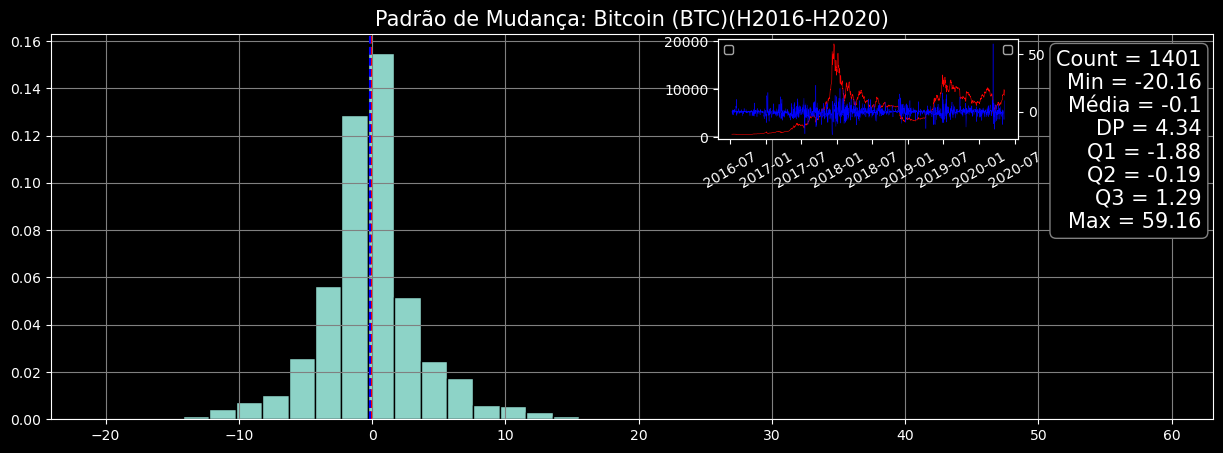

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


29.03 3003.0


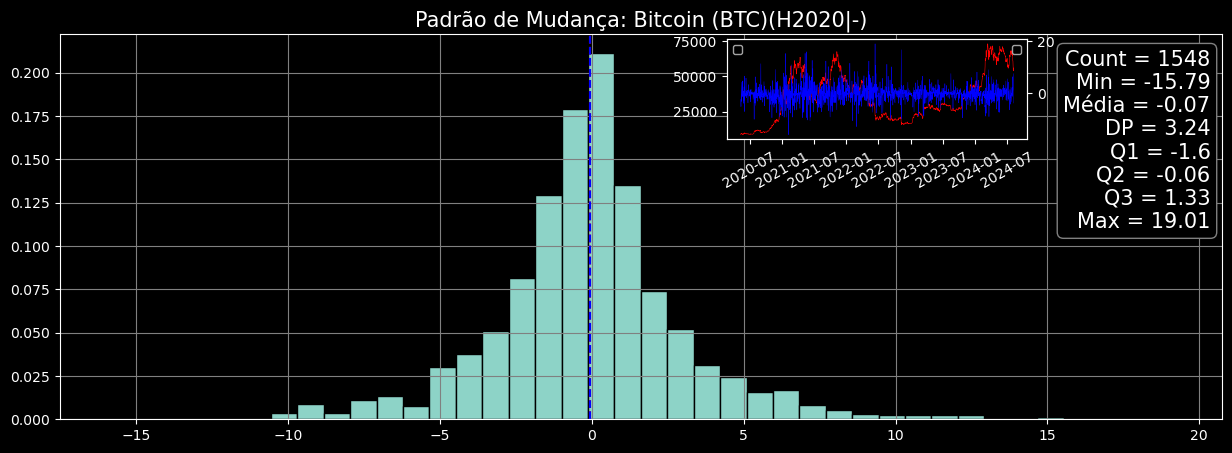

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


7.3 830.0
============================================= BNB =============================================


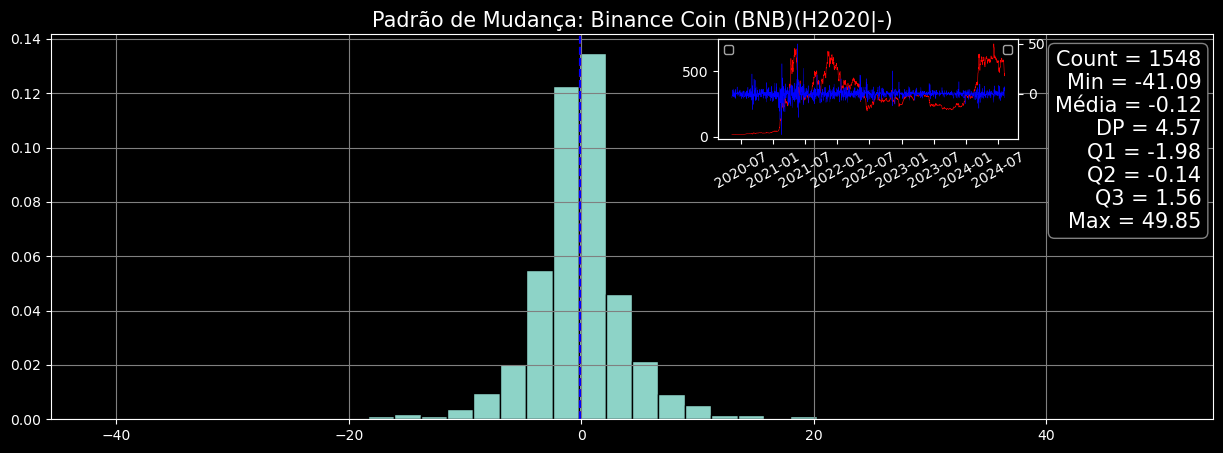

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


44.13 4513.0
============================================= ETH =============================================


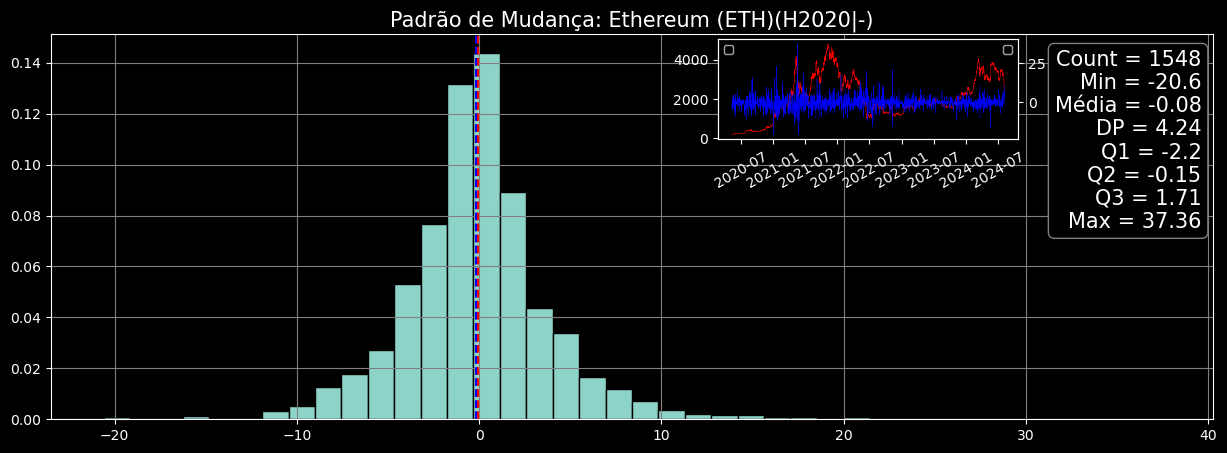

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


24.42 2542.0
============================================= SOL =============================================


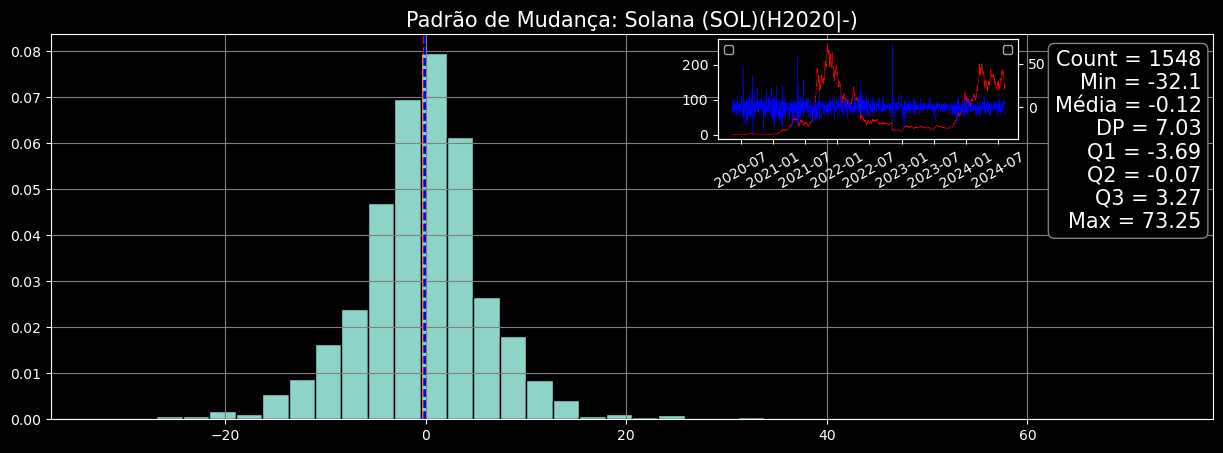

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


479.78 48078.0
============================================= AVAX =============================================


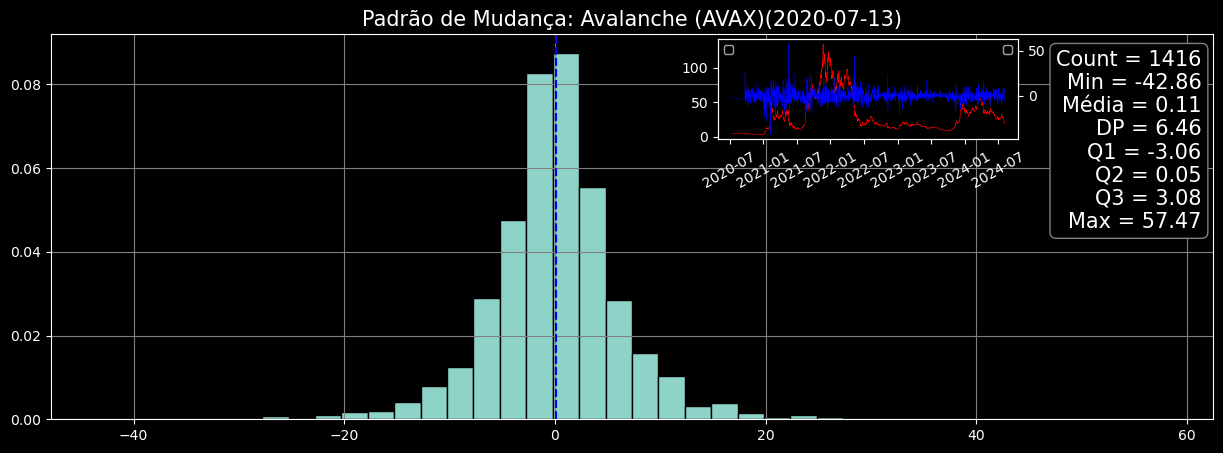

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
26.48 2748.0
============================================= ADA =============================================


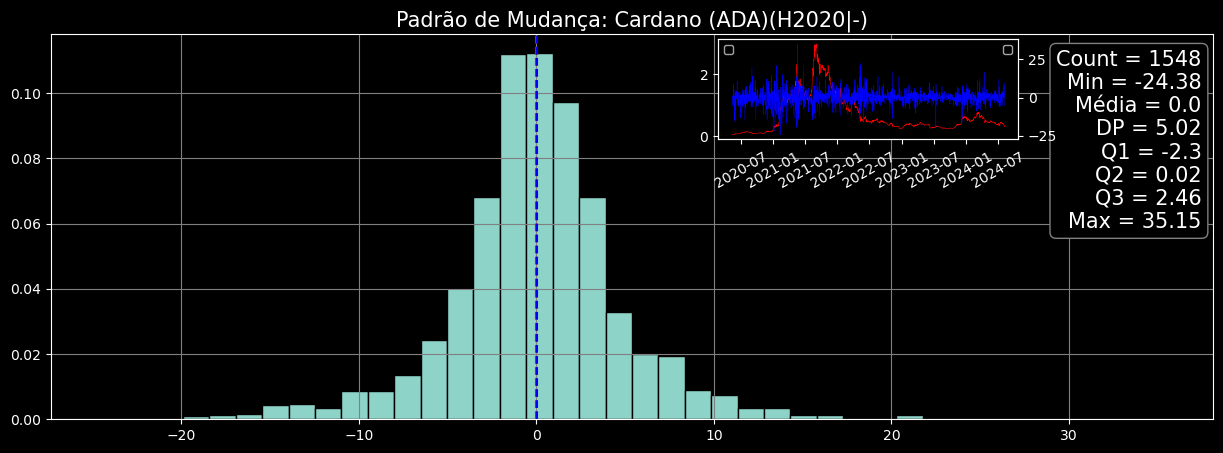

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


57.87 5887.0
============================================= XRP =============================================


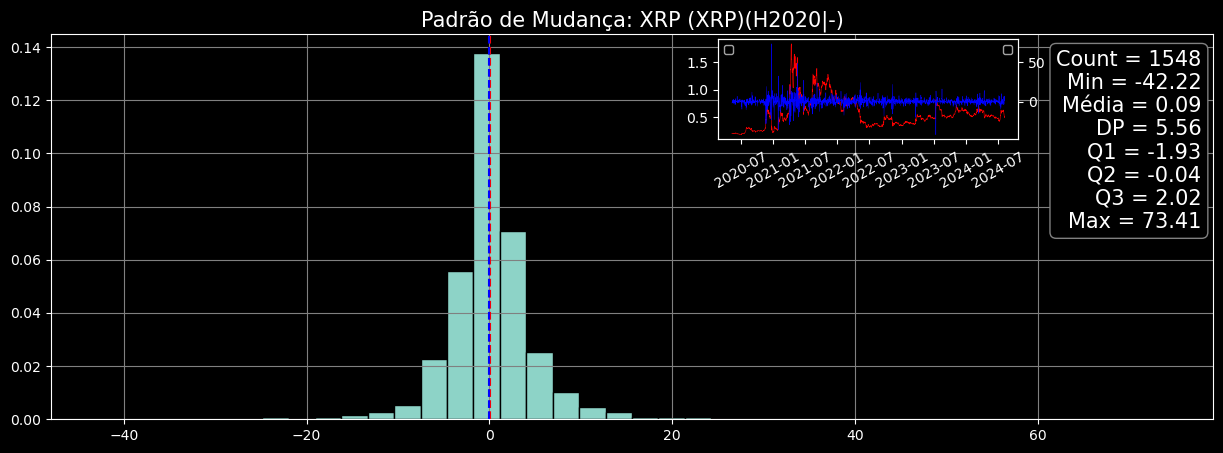

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


8.31 931.0
============================================= RNDR =============================================


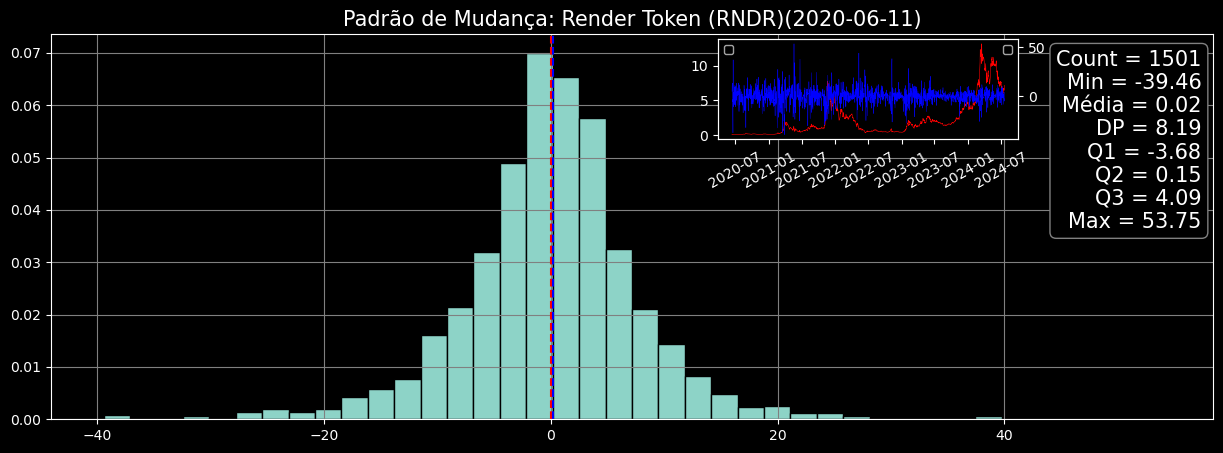

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
234.97 23597.0
============================================= GRT =============================================


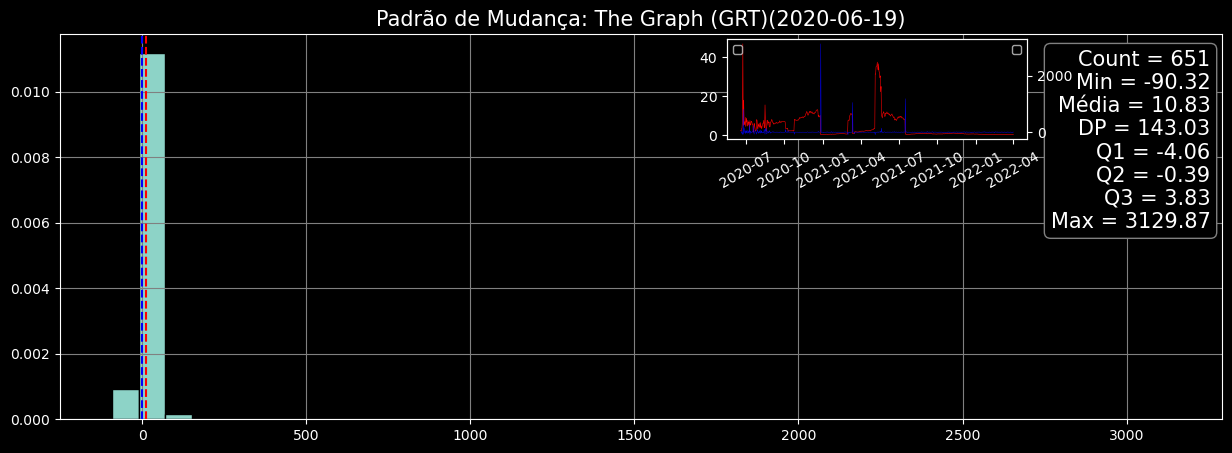

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
17.15 1815.0
============================================= AGIX =============================================


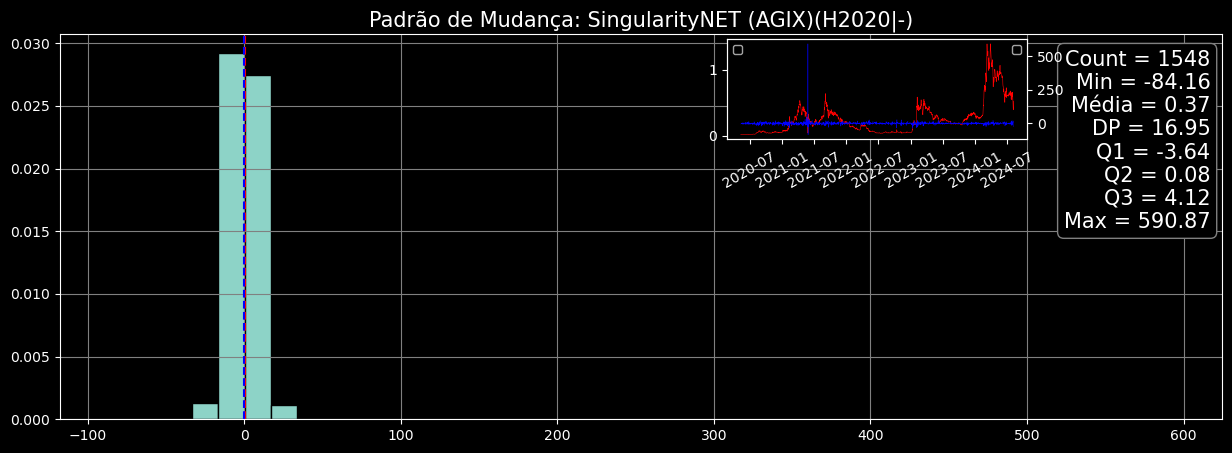

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


106.49 10749.0
============================================= OCEAN =============================================


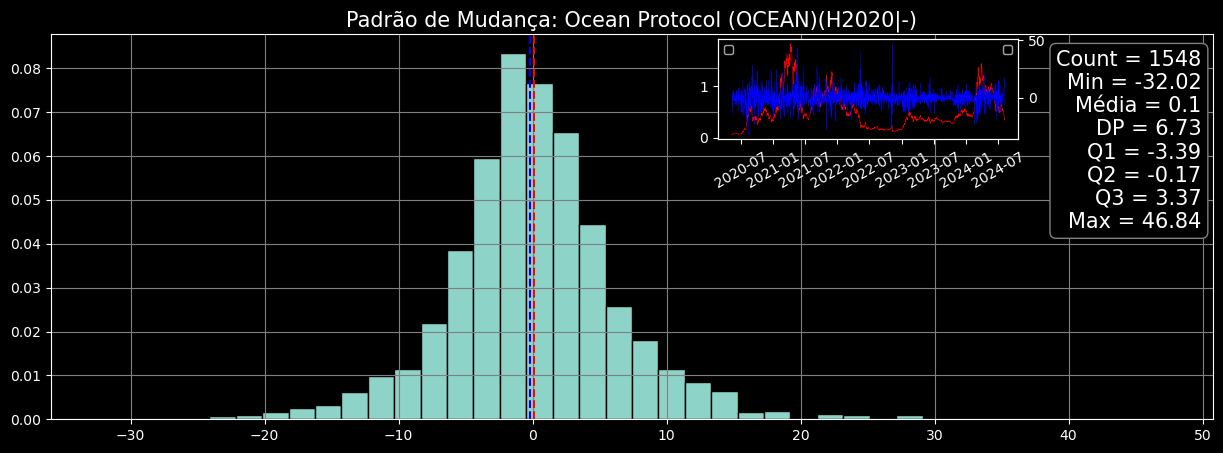

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


28.39 2939.0
============================================= INJ =============================================


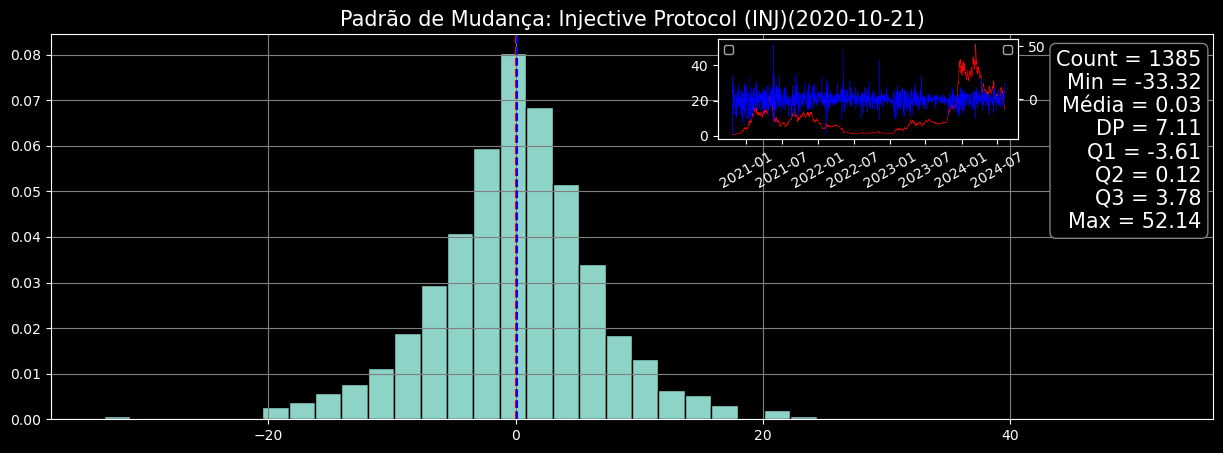

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
66.3 6730.0
============================================= KAS =============================================


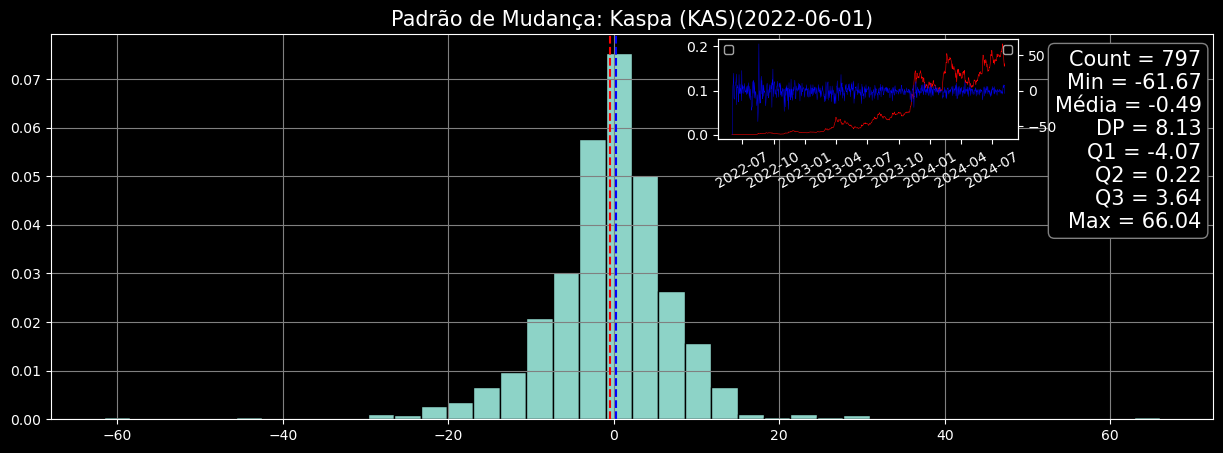

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
1116.34 111734.0
============================================= CSPR =============================================


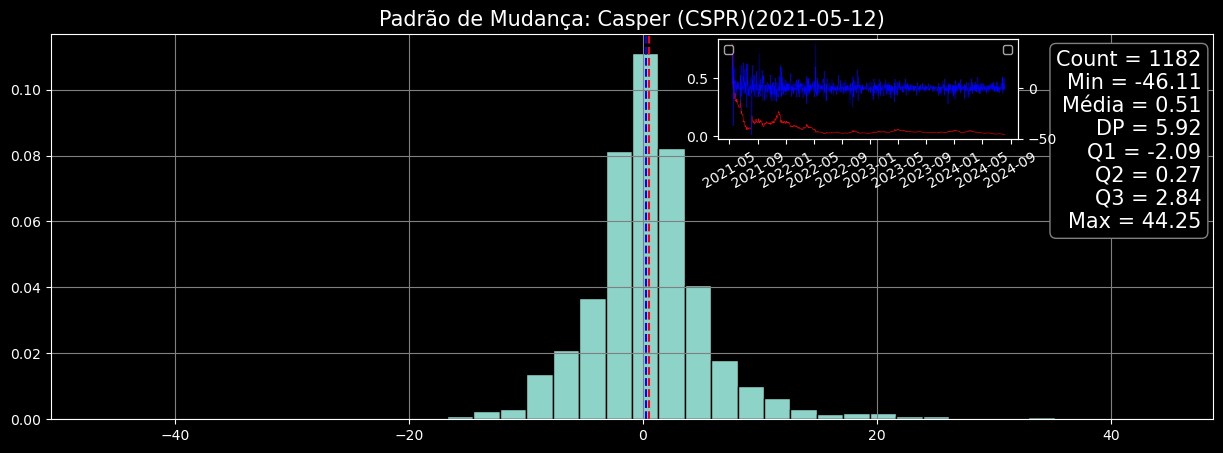

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
0.0 100.0
============================================= PLA =============================================


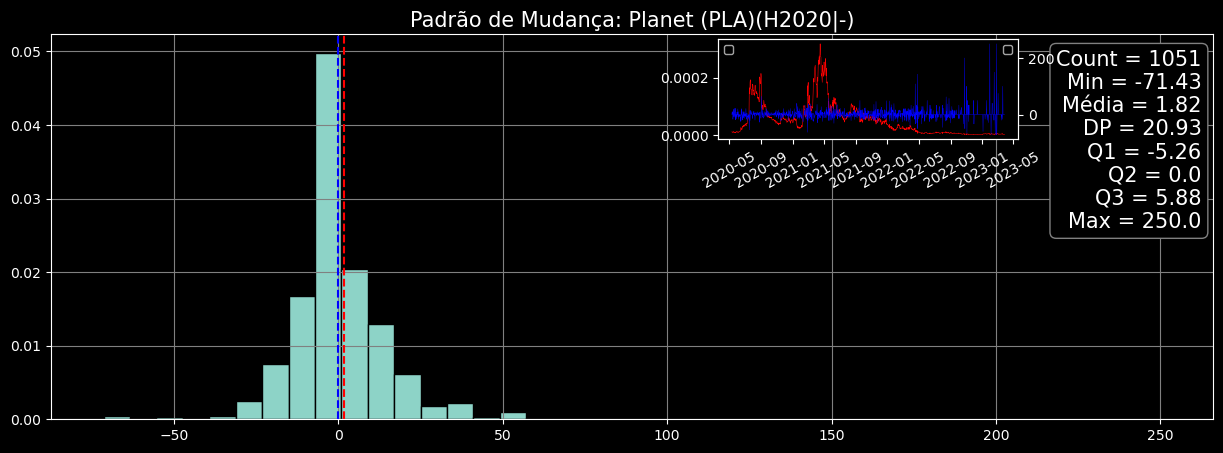

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


25.5 2650.0
============================================= LMWR =============================================


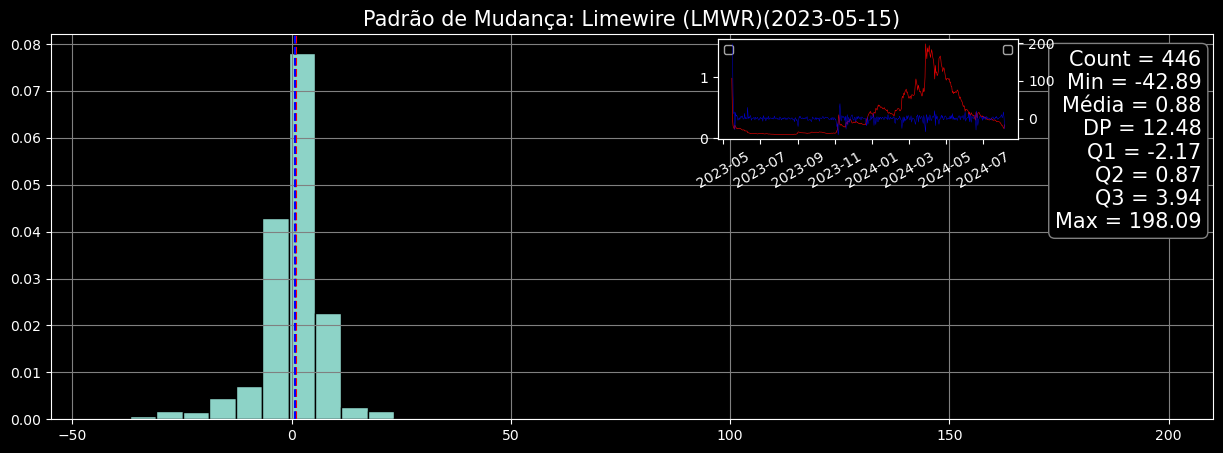

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
0.57 157.0
============================================= INSP =============================================


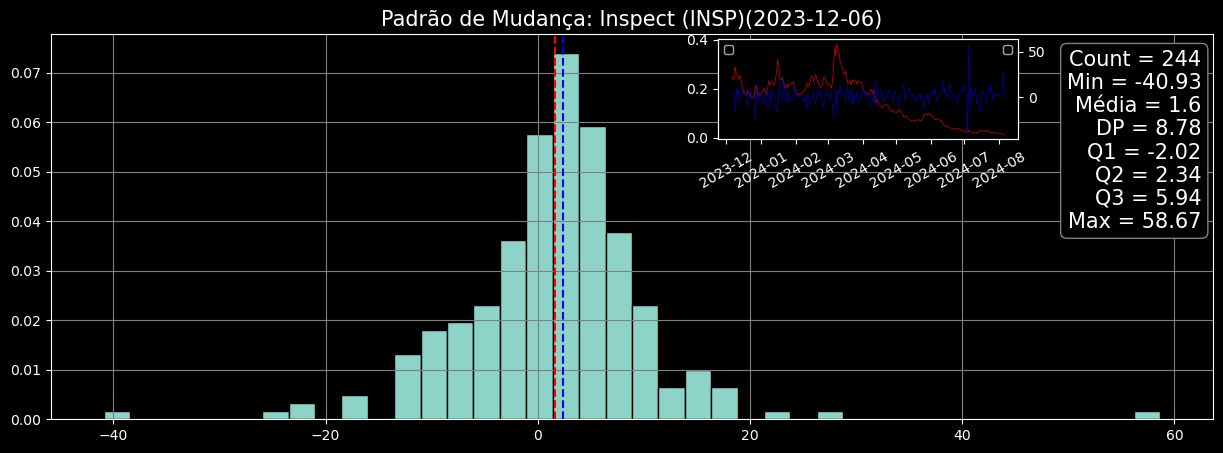

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


*
0.53 153.0
============================================= BCH =============================================


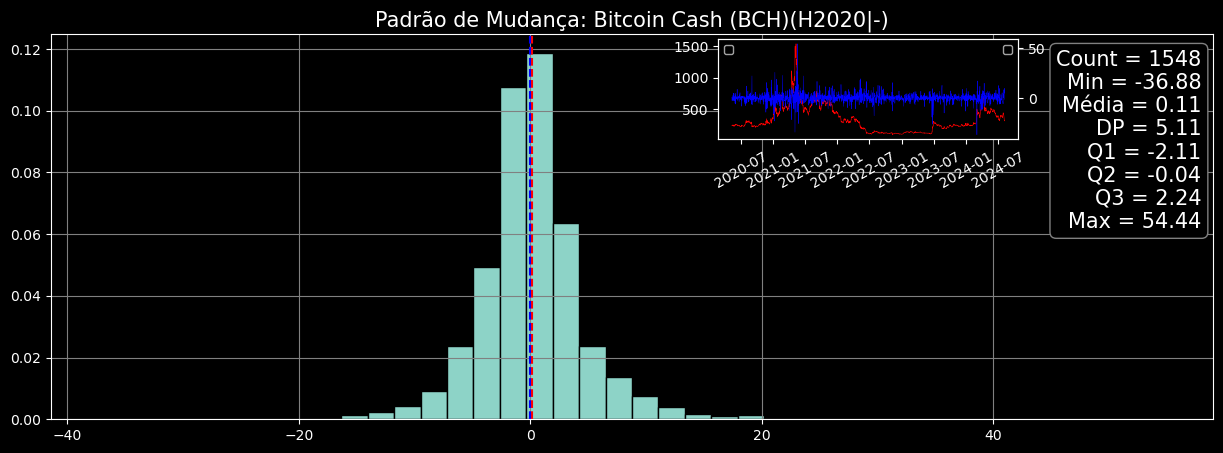

5.62 662.0


In [19]:
investimento = 100

data_halving_2016 = '2016-07-09'
data_halving_2020 = '2020-05-11'


for df, nome in zip(cryptos, cryptos_nome.keys()):
    count = 0
    print("="*45, nome, "="*45)
    if datetime.strptime(data_halving_2016, '%Y-%m-%d') in df.index:
        
        # Valor de Mudança antes do Halving(2016)
        # Retorno se tivesse comprado no halving e vendido na maxima
        dff = df[df.index < datetime.strptime(data_halving_2016, '%Y-%m-%d')] #antes da data
        hist_mudanca(dff, cryptos_nome[nome] + " (" + nome + ")" + "(-|H2016)", 'mudança')
        primero_preco = dff['Close'][dff.index[0]]
        maxima_atingida = dff['Close'].max()
        calculo(investimento, dff, primero_preco, maxima_atingida)

        # Valor de Mudança depois do Halving(2016) até o proximo Halving(2020)
        # Retorno se tivesse comprado no halving e vendido na maxima
        dff = df[(df.index > datetime.strptime(data_halving_2016, '%Y-%m-%d')) &
                 (df.index < datetime.strptime(data_halving_2020, '%Y-%m-%d'))] #depois e antes(2020)
        hist_mudanca(dff, cryptos_nome[nome] + " (" + nome + ")" + "(H2016-H2020)", 'mudança')
        primero_preco = dff['Close'][dff.index[0]]
        maxima_atingida = dff['Close'].max()
        calculo(investimento, dff, primero_preco, maxima_atingida)
    else:
        count += 1

    if datetime.strptime(data_halving_2020, '%Y-%m-%d') in df.index:
        
        # Valor de Mudança depois do Halving(2020)
        # Retorno se tivesse comprado no halving e vendido na maxima
        dff = df[df.index > datetime.strptime(data_halving_2020, '%Y-%m-%d')] #depois e antes(2020)
        hist_mudanca(dff, cryptos_nome[nome] + " (" + nome + ")" + "(H2020|-)", 'mudança')
        primero_preco = dff['Close'][dff.index[0]]
        maxima_atingida = dff['Close'].max()
        calculo(investimento, dff, primero_preco, maxima_atingida)
    else:
        count += 1
    if count == 2:
        hist_mudanca(df, cryptos_nome[nome] + " (" + nome + ")" + "("+str(df.index[0])[:10]+")", 'mudança')
        primero_preco = df['Close'][df.index[0]]
        maxima_atingida = df['Close'].max()
        print("*")
        calculo(investimento, df, primero_preco, maxima_atingida)

# Função de médias moveis:

In [20]:
#CRIANDO COLUNAS DE MÉDIA MOVÉIS
#Adiciona colunas de médias móveis (SMA e EMA) a um DataFrame de preços de criptomoedas.

def adicionar_medias_moveis(df):
    
    # Médias Móveis Simples (SMA)
    df['SMA_7'] = df['Close'].rolling(window=7).mean()
    df['SMA_25'] = df['Close'].rolling(window=25).mean()
    df['SMA_99'] = df['Close'].rolling(window=99).mean()

    # Médias Móveis Exponenciais (EMA)
    df['EMA_7'] = df['Close'].ewm(span=7, adjust=False).mean()
    df['EMA_25'] = df['Close'].ewm(span=25, adjust=False).mean()
    df['EMA_99'] = df['Close'].ewm(span=99, adjust=False).mean()

    return df

for df in cryptos:
    df = adicionar_medias_moveis(df)

# Grafico de Linhas de acompanhamento dos Preços:

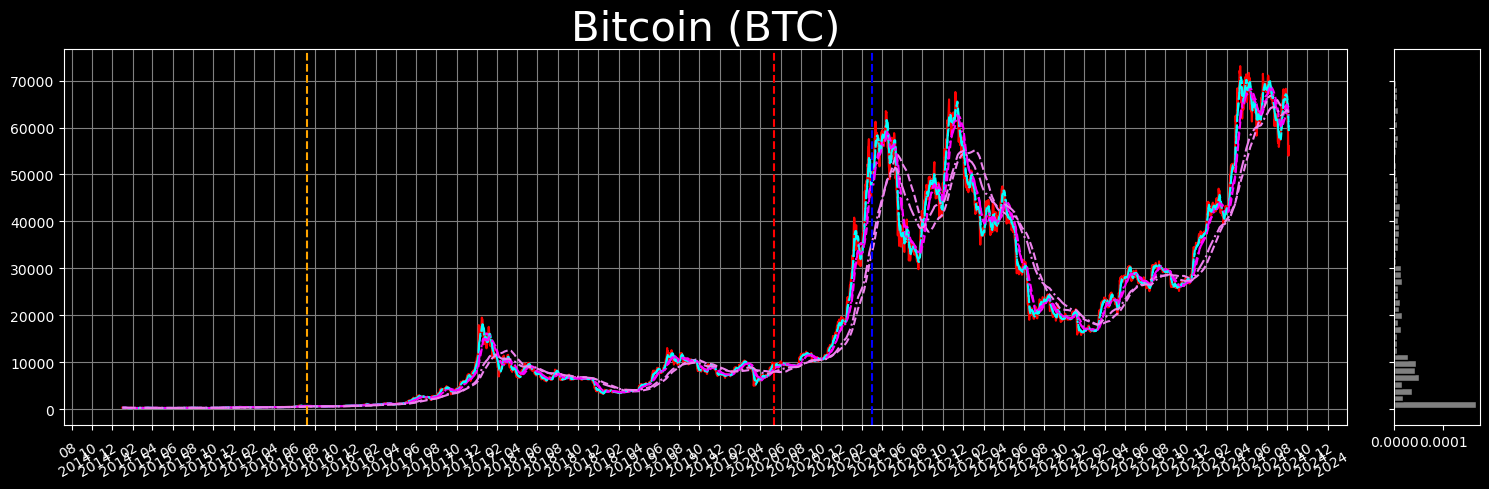

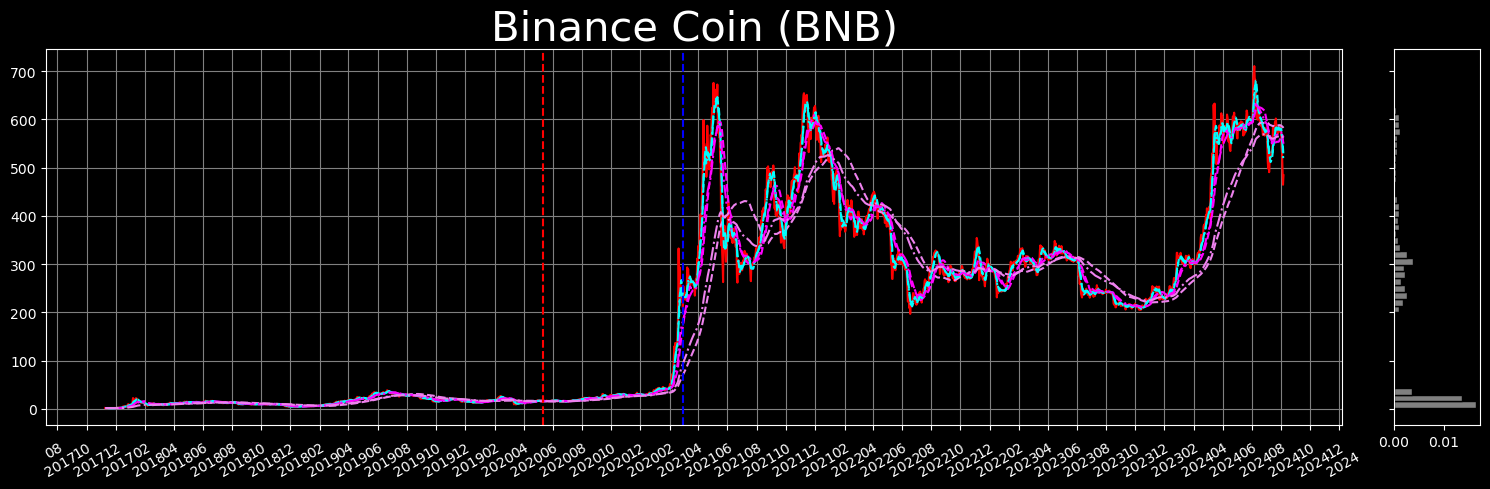

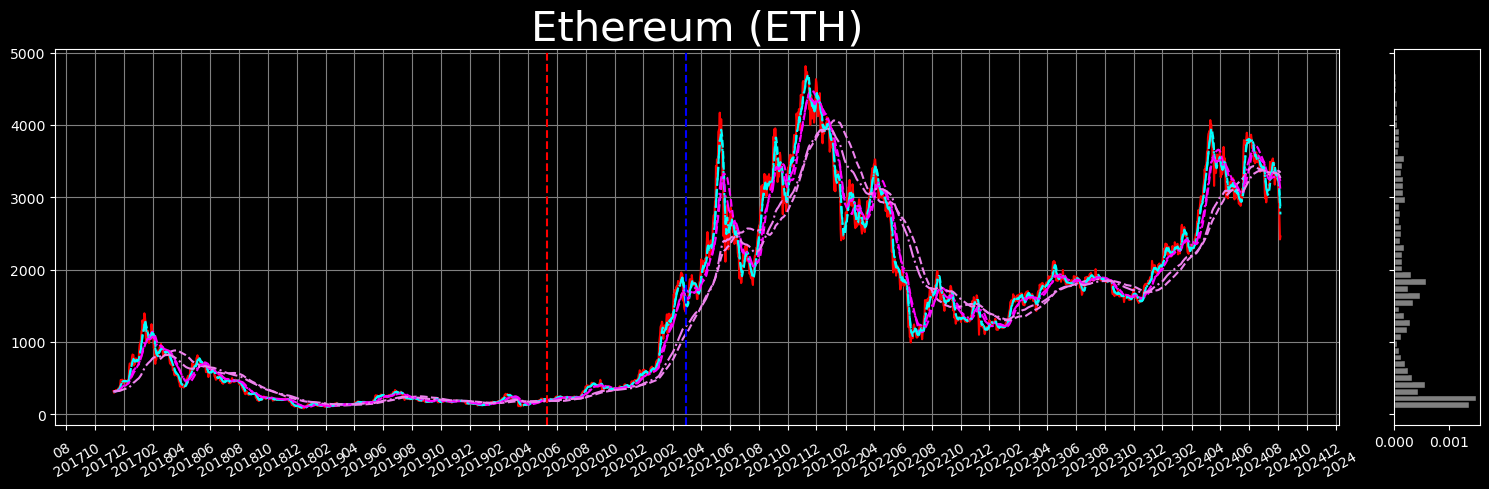

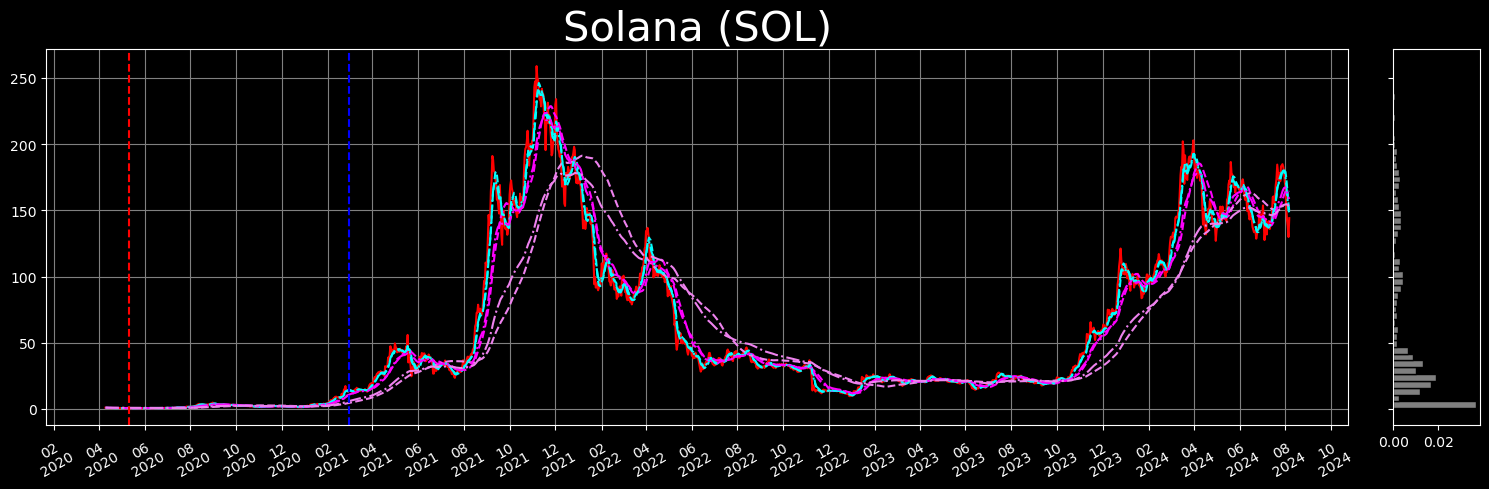

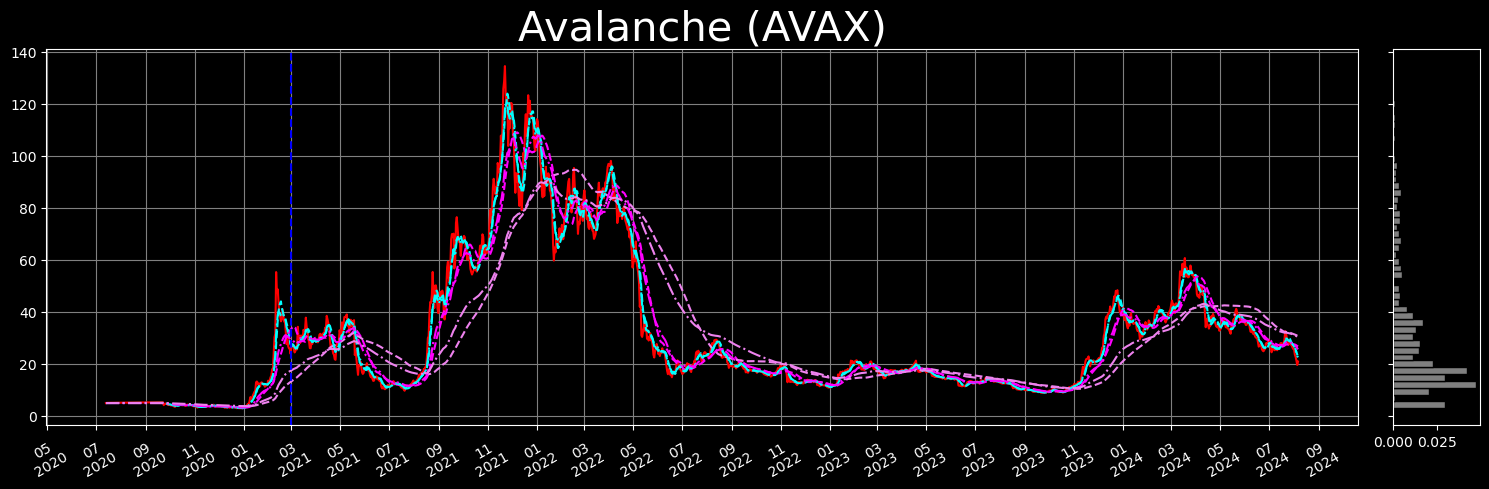

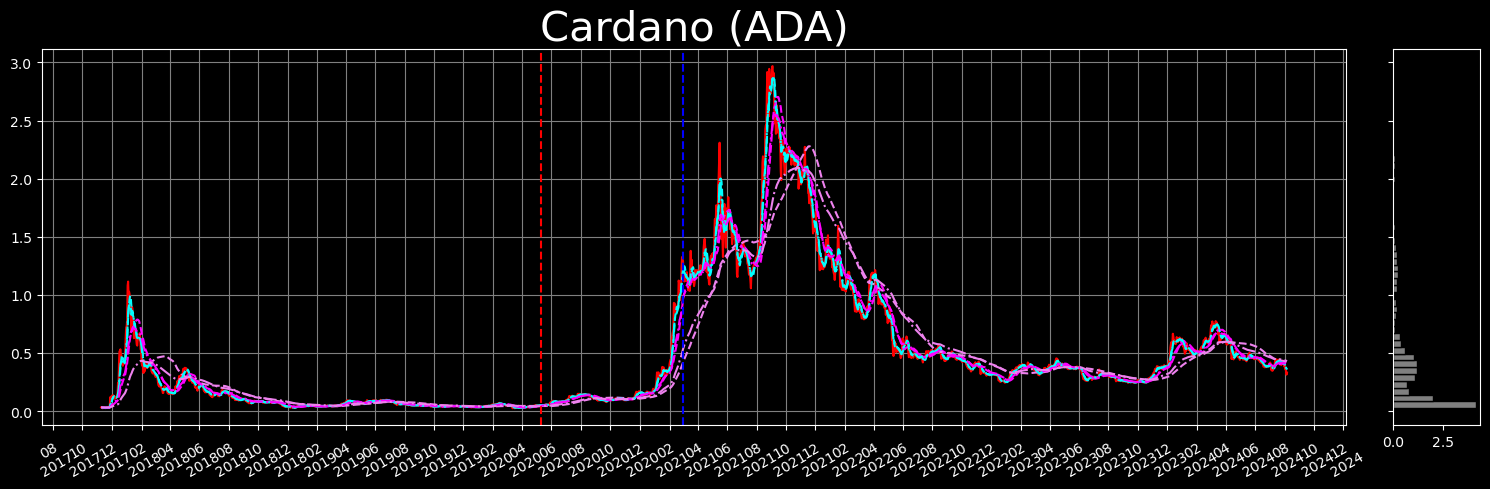

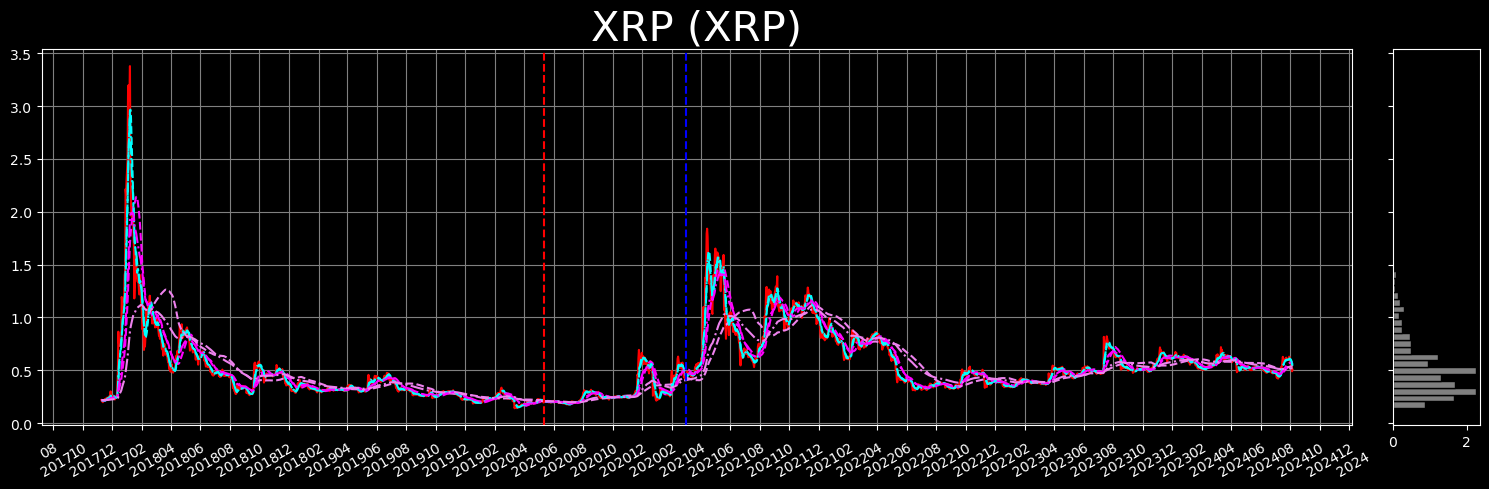

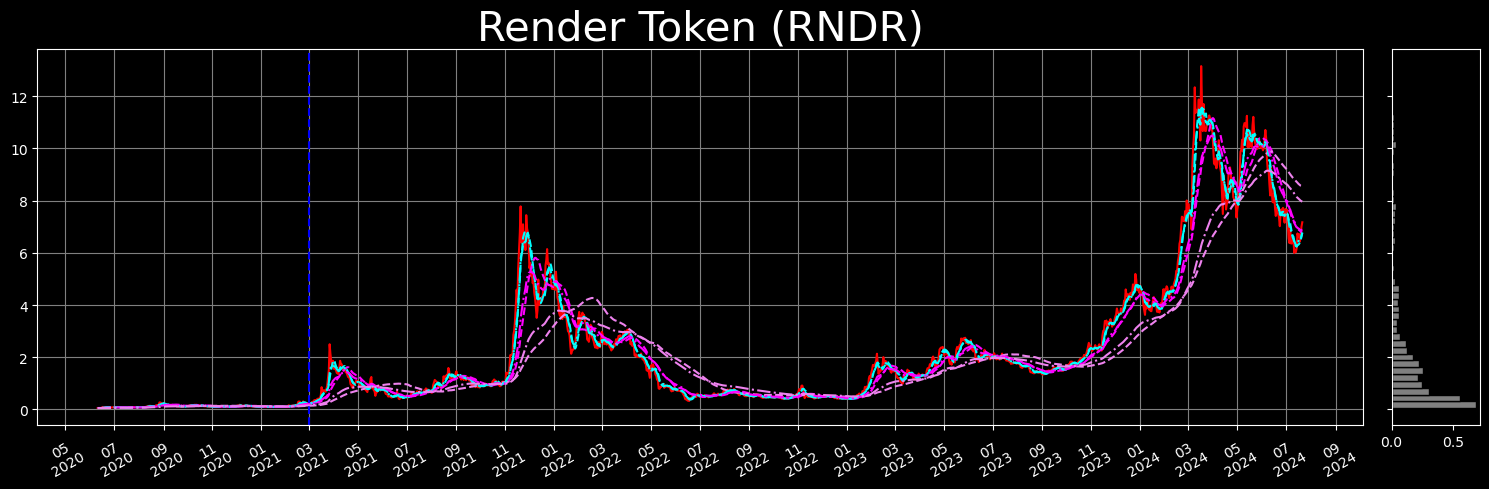

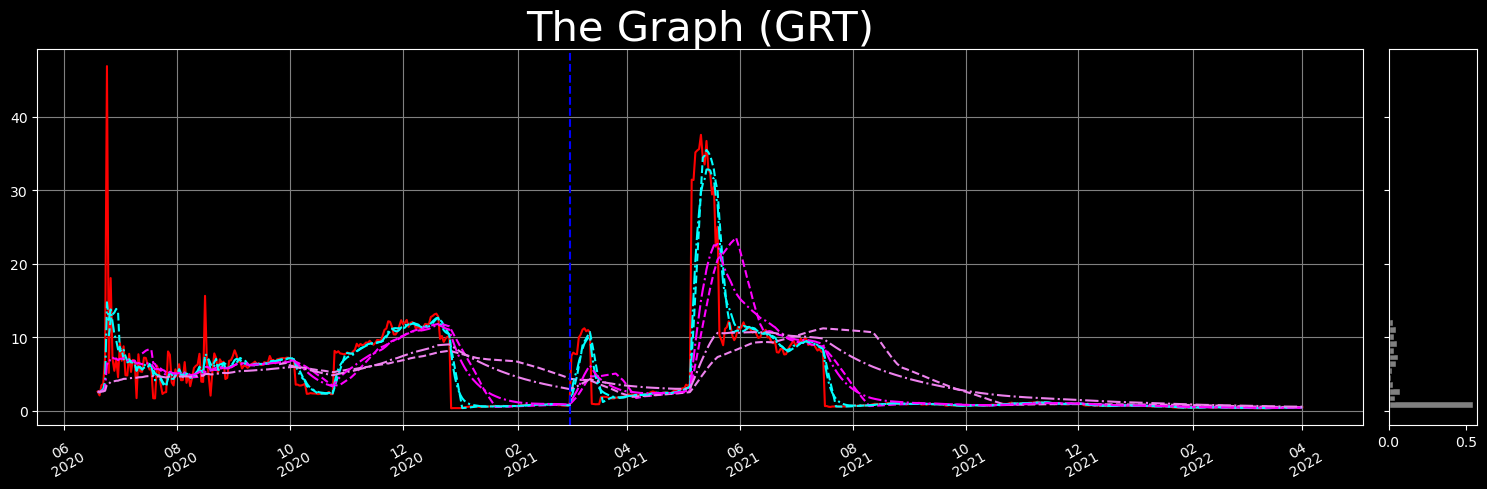

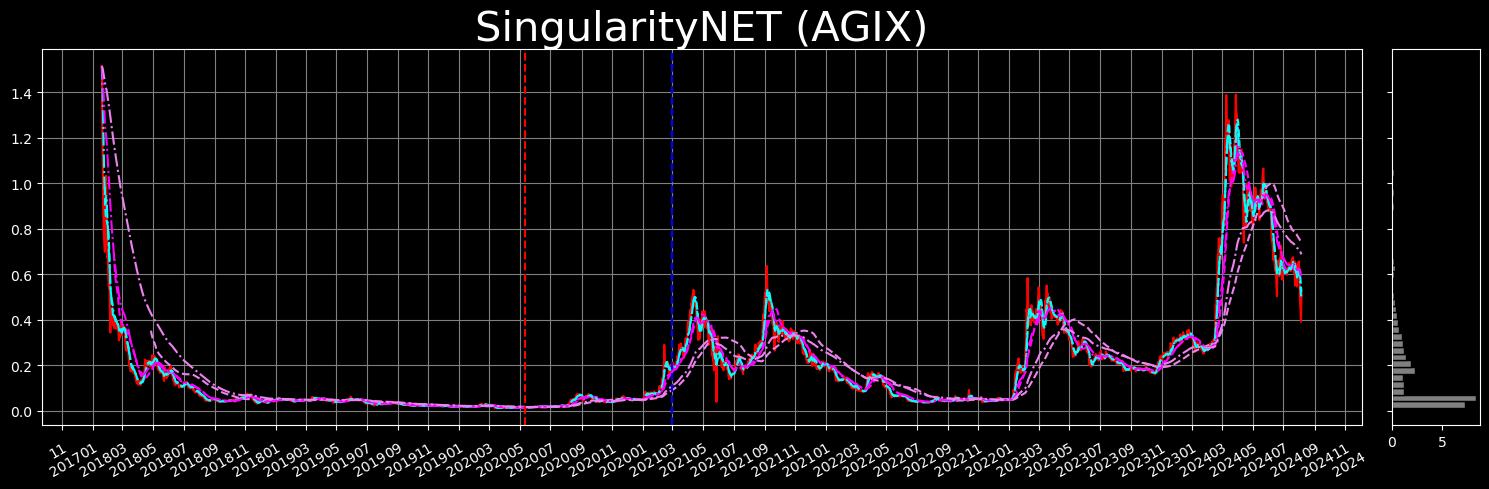

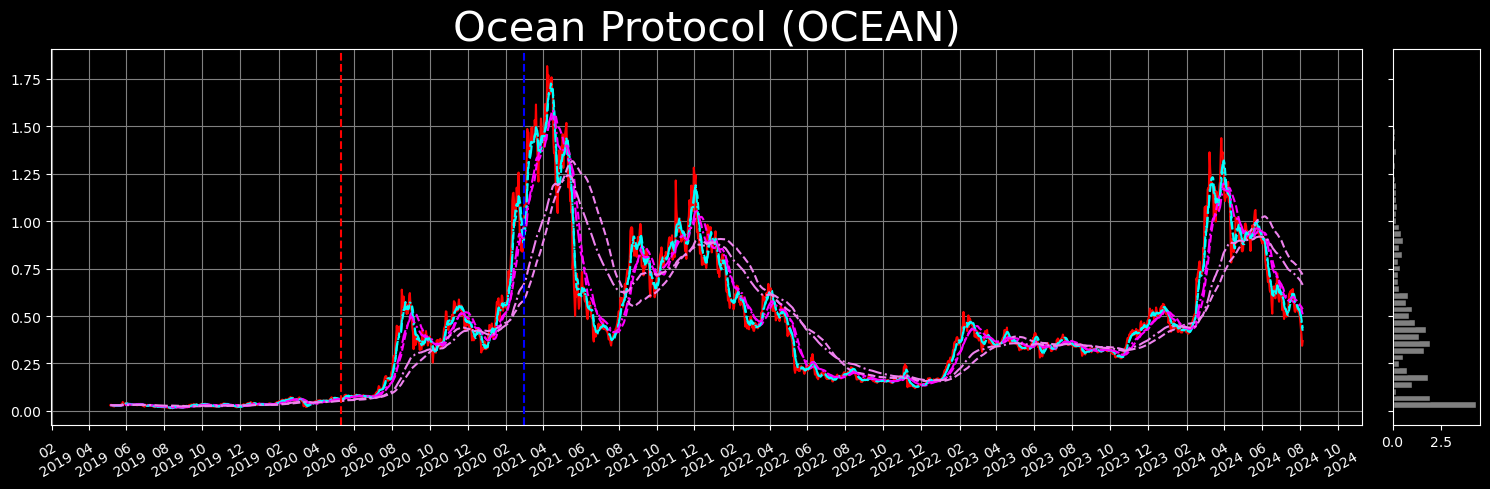

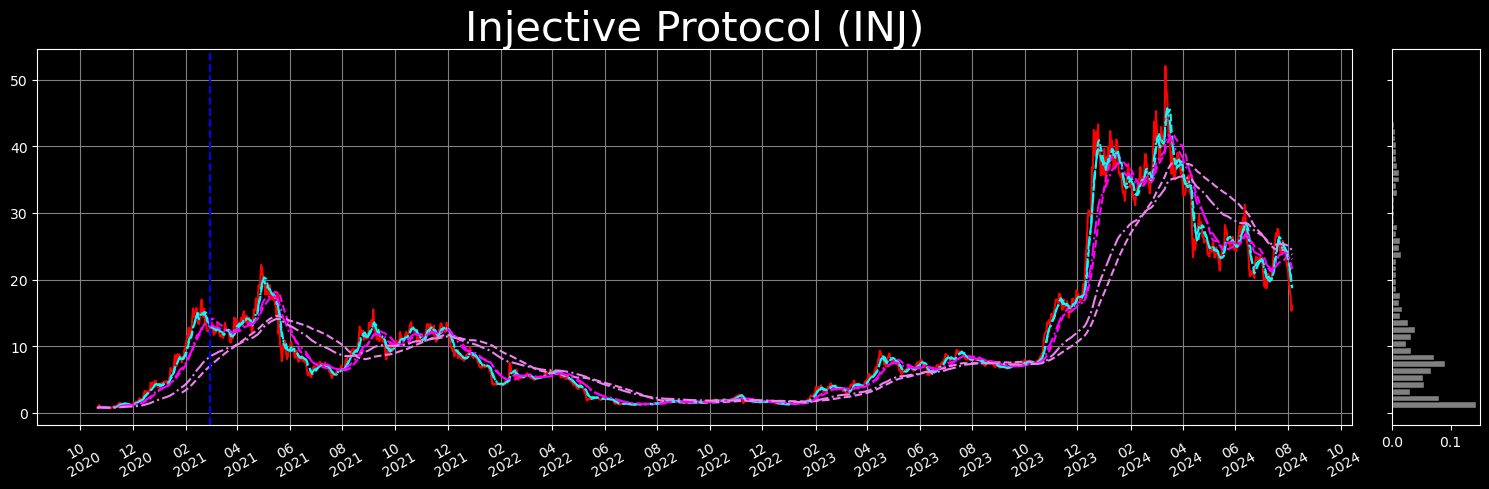

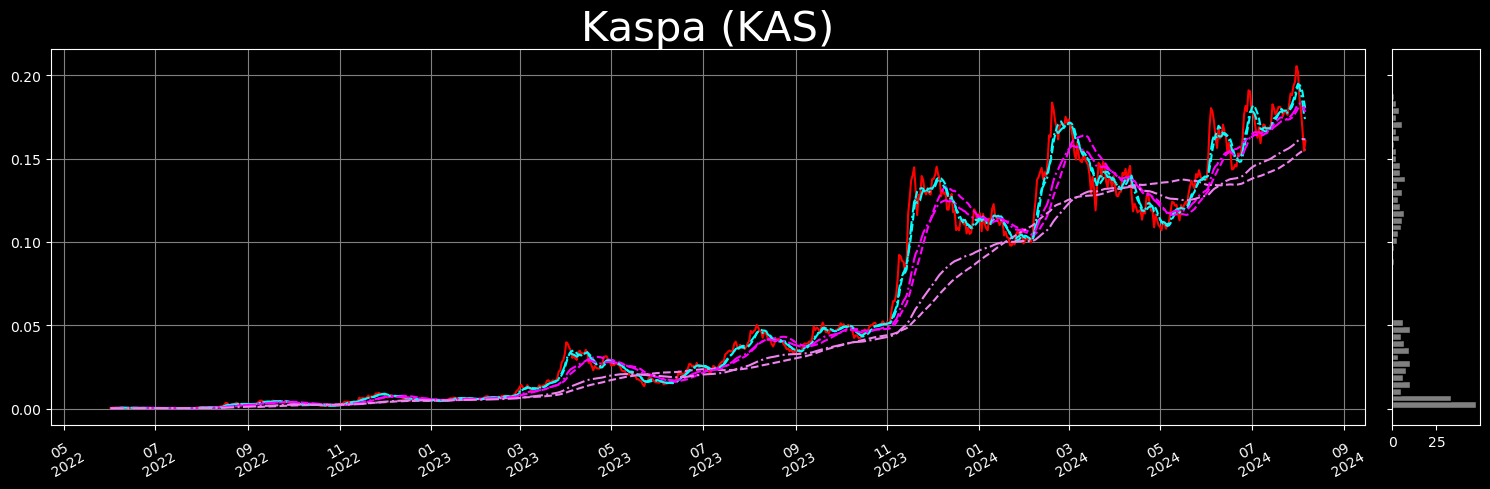

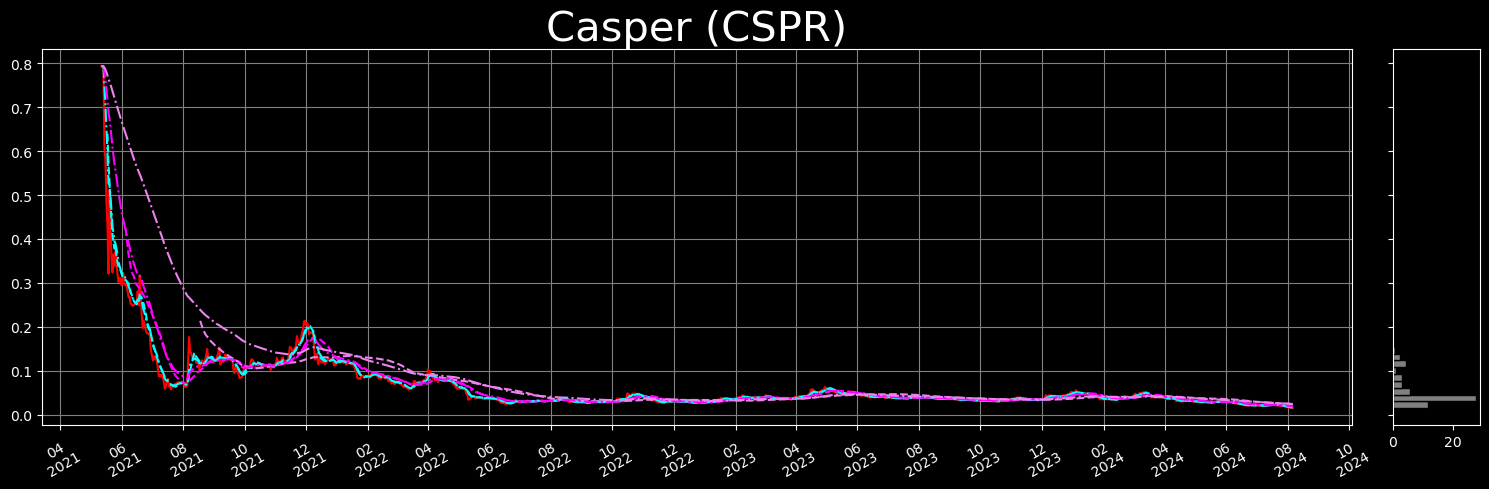

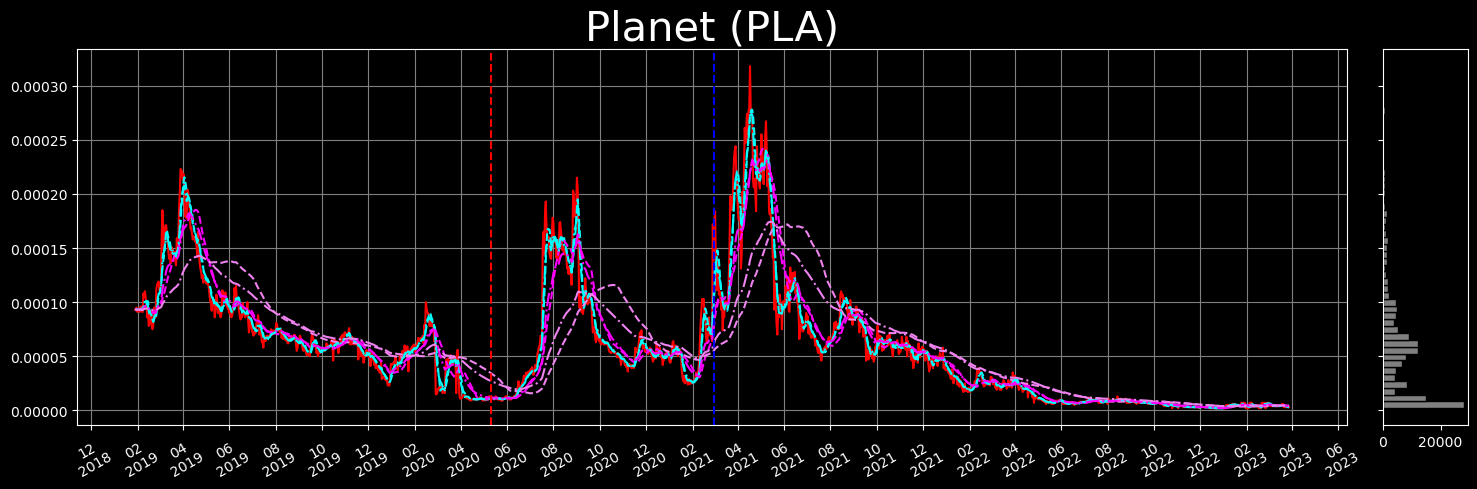

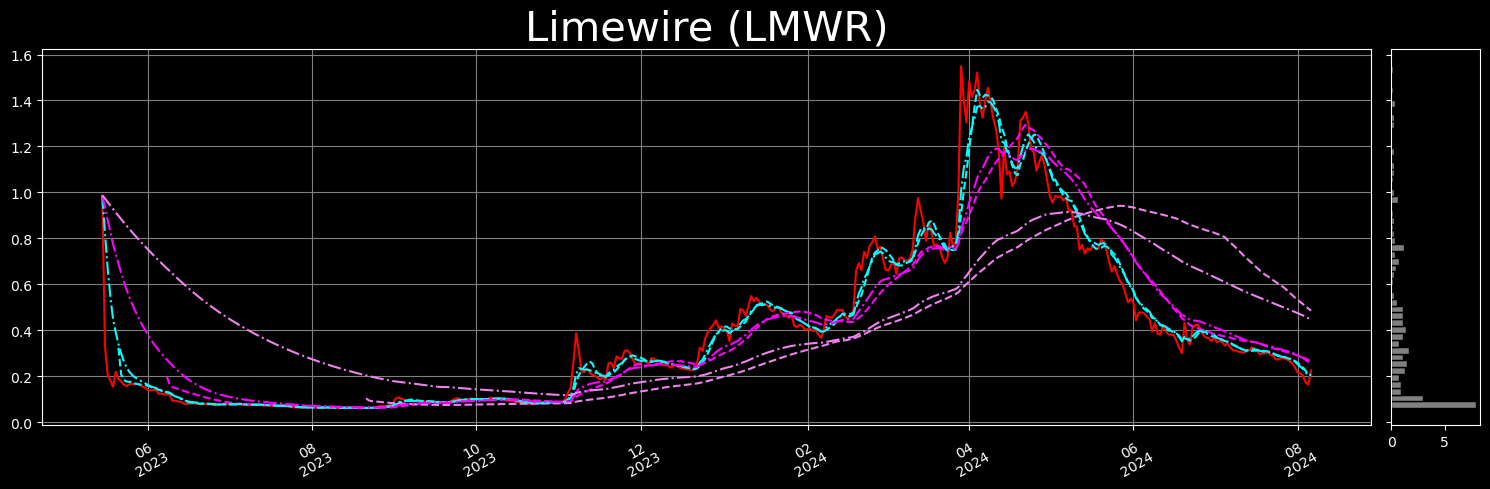

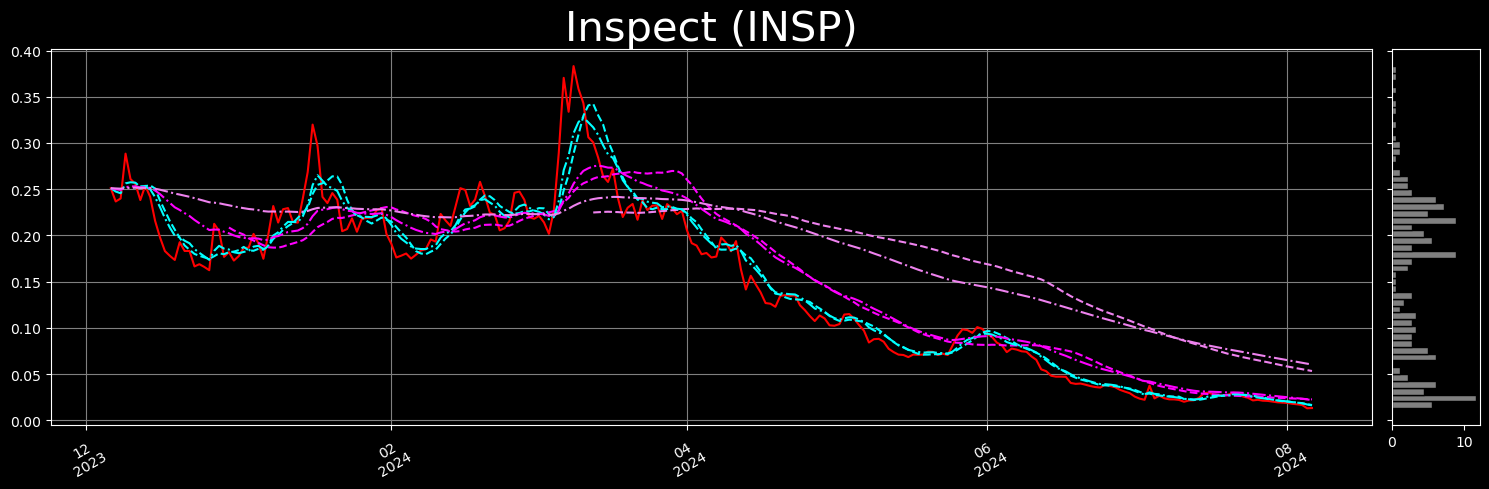

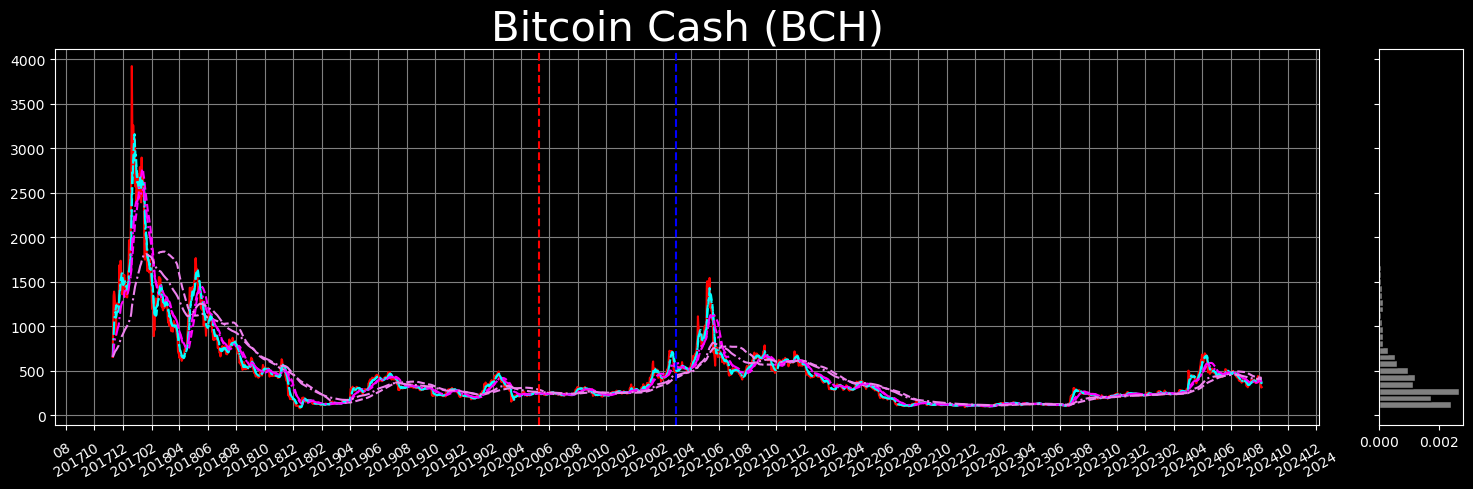

In [21]:
from datetime import datetime, date

def plot_price(dataframe, moeda, line_color='blue'):
    # Criar uma figura e dois subplots lado a lado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), 
                                   gridspec_kw={'width_ratios': [15, 1]}, sharey=True)
    
    ax1.plot(dataframe.index, dataframe['Close'], color=line_color)
    ax1.set_title(moeda, fontsize=30)
    
    try:
        # Adicionar linhas para as médias móveis no ax1
        ax1.plot(dataframe.index, dataframe['SMA_7'], color='cyan', linestyle='--', linewidth=1.5)
        ax1.plot(dataframe.index, dataframe['SMA_25'], color='magenta', linestyle='--', linewidth=1.5)
        ax1.plot(dataframe.index, dataframe['SMA_99'], color='violet', linestyle='--', linewidth=1.5)

        ax1.plot(dataframe.index, dataframe['EMA_7'], color='cyan', linestyle='-.', linewidth=1.5)
        ax1.plot(dataframe.index, dataframe['EMA_25'], color='magenta', linestyle='-.', linewidth=1.5)
        ax1.plot(dataframe.index, dataframe['EMA_99'], color='violet', linestyle='-.', linewidth=1.5)
    except KeyError:
        # Caso as colunas das médias móveis não existam, apenas continua
        pass
    
    #######################################################################################
    #HALVINGS#############################################
    halving_date2016 = datetime.strptime('2016-07-09', '%Y-%m-%d')
    if dataframe.index.min() <= halving_date2016:
        ax1.axvline(x=halving_date2016, color='orange', linestyle='--', label='Halving')
    
    halving_date2020 = datetime.strptime('2020-05-11', '%Y-%m-%d')
    if dataframe.index.min() <= halving_date2020:
        ax1.axvline(x=halving_date2020, color='red', linestyle='--', label='Halving')
    
    #OUTRAS DATAS#############################################
    crescimento_pos_halving2020 = datetime.strptime('2021-03-01', '%Y-%m-%d')
    if dataframe.index.min() <= crescimento_pos_halving2020:
        ax1.axvline(x=crescimento_pos_halving2020, color='blue', linestyle='--', label='Halving')
    
    #######################################################################################

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m\n%Y')) # Formato do ano e mês
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2)) # Intervalo de 2 meses
    ax1.grid(True, color='gray')
    ax1.tick_params(axis='x', rotation=30)
    
    # Plotar o histograma no ax2
    ax2.hist(dataframe['Close'], bins=50, orientation='horizontal', color='gray',
             edgecolor='black', density=True)

    '''    # Adicionar legenda personalizada
    texto_count = 'Count = ' + str(round(len(df.dropna(subset=['Close'])), 2))
    texto_media = 'Média = '+ str(round(df['Close'].mean(), 2))
    texto_dp = 'DP = '+ str(round(df['Close'].std(), 2))
    texto_min = 'Min = '+ str(round(df['Close'].min(), 2))
    texto_Q1 = 'Q1 = ' + str(round(df['Close'].quantile(0.25), 2))
    texto_mediana = 'Q2 = '+ str(round(df['Close'].median(), 2))
    texto_Q3 = 'Q3 = ' + str(round(df['Close'].quantile(0.75), 2))
    texto_max = 'Max = '+ str(round(df['Close'].max(), 2))
    texto_legenda = '\n'.join([texto_count, 
                               texto_min,
                               texto_media, texto_dp, 
                               texto_Q1, texto_mediana, texto_Q3,
                               texto_max])
    
    ax1.text(0.01, 0.95, texto_legenda, ha='left', va='top', transform=ax1.transAxes,
             bbox=dict(facecolor='black', edgecolor='gray', boxstyle='round'),
             fontsize=15)'''

    plt.tight_layout()
    plt.show()


for df, nome in zip(cryptos, cryptos_nome.keys()):
    plot_price(df, moeda= cryptos_nome[nome] + " (" + nome + ")", line_color='red')


O ano de 2020 foi, em geral, favorável para as criptomoedas, mas elas realmente explodiram em valor a partir de dezembro de 2020. Moedas como a XRP inicialmente não seguiram essa tendência explosiva, mas foram puxadas por outras criptomoedas ao longo de 2021.

Em 20 de dezembro de 2020, Elon Musk expressou interesse em criptomoedas, especificamente no Dogecoin. Isso gerou notícias sobre o aumento súbito dessa criptomoeda - que tem valor principalmente especulativo e como uma piada de internet - e também um aumento geral no interesse em criptomoedas, notavelmente o Bitcoin e o Ethereum. Uma hipótese é que os comentários de Elon Musk foram o **gatilho** que iniciou a alta das criptomoedas, que se manteve devido a seus **valores individuais como ativos financeiros**.

O ponto de vale observado na metade de 2021 se deve às tentativas da China em banir criptomoedas - que se intensificaram nesse período - e a uma resposta dos mercados à segunda onda mundial de COVID-19. O mercado de cripto em geral, porém, **rapidamente retornou** aos seus picos explosivos do início do ano.

Nem todas as moedas acompanharam esse crescimento. Enquanto o Bitcoin, Ethereum e BNB **voltaram aos seus valores de pico**, Litecoin e XRP traçaram caminhos similares ao Dogecoin, **se estabilizando próximo ao valor de vale de 2021**. Para essas três criptomoedas, esse valor ainda é substancialmente superior ao de 2020.


# Correlação Entre as Moedas

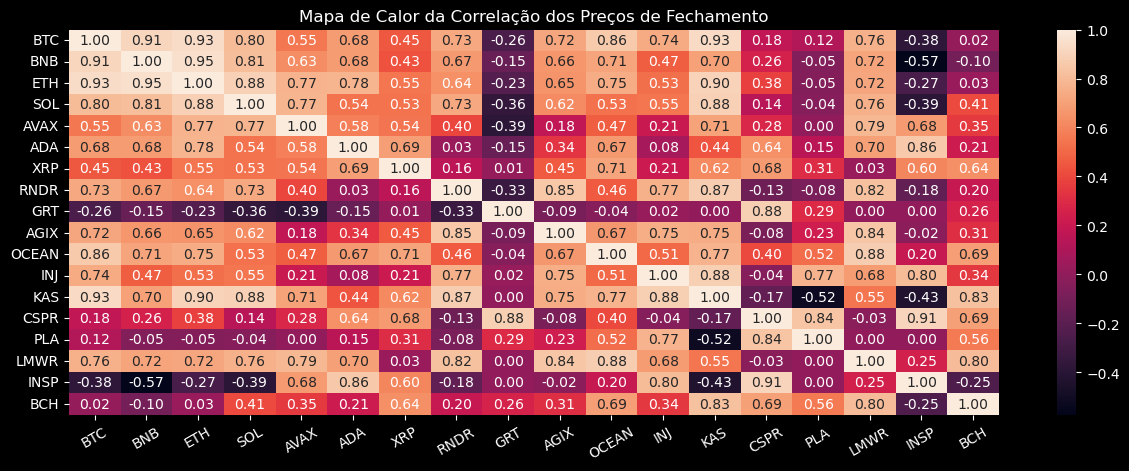

In [22]:
# FUNÇÃO DE CORRELAÇÃO ENTRE DOIS PREÇOS
# Correlação entre os preços de fechamento dos dois DataFrames
def calcular_correlacao(df1, df2):
    close1 = df1['Close']
    close2 = df2['Close']

    close1_aligned, close2_aligned = close1.align(close2, join='inner') # Alinhar os índices dos DataFrames
    correlacao = close1_aligned.corr(close2_aligned) # Calcular e retornar a correlação
    return correlacao

################################################################################################
# MEDINDO O GRAU DE CORRELAÇÃO ENTRE AS MOEDAS

correlation_table = pd.DataFrame(index=cryptos_nome.keys(), columns=cryptos_nome.keys())
# Calcular a correlação entre cada par
for i, df1 in enumerate(cryptos):
    for j, df2 in enumerate(cryptos):
        correlation_table.iloc[i, j] = calcular_correlacao(df1, df2)
        
correlation_table = correlation_table.fillna(0)

################################################################################################

# REPRESENTAÇÃO GRAFICA 
# Usar Seaborn para criar o mapa de calor
plt.figure(figsize=(15, 5))
sns.heatmap(correlation_table.astype(float), annot=True, fmt=".2f")#, cmap='plasma')
plt.xticks(rotation=30)
plt.title('Mapa de Calor da Correlação dos Preços de Fechamento')
plt.show()

In [23]:
round(correlation_table, 2)

BTC   BNB   ETH   SOL  AVAX   ADA   XRP  RNDR   GRT  AGIX  OCEAN  \
BTC    1.00  0.91  0.93  0.80  0.55  0.68  0.45  0.73 -0.26  0.72   0.86   
BNB    0.91  1.00  0.95  0.81  0.63  0.68  0.43  0.67 -0.15  0.66   0.71   
ETH    0.93  0.95  1.00  0.88  0.77  0.78  0.55  0.64 -0.23  0.65   0.75   
SOL    0.80  0.81  0.88  1.00  0.77  0.54  0.53  0.73 -0.36  0.62   0.53   
AVAX   0.55  0.63  0.77  0.77  1.00  0.58  0.54  0.40 -0.39  0.18   0.47   
ADA    0.68  0.68  0.78  0.54  0.58  1.00  0.69  0.03 -0.15  0.34   0.67   
XRP    0.45  0.43  0.55  0.53  0.54  0.69  1.00  0.16  0.01  0.45   0.71   
RNDR   0.73  0.67  0.64  0.73  0.40  0.03  0.16  1.00 -0.33  0.85   0.46   
GRT   -0.26 -0.15 -0.23 -0.36 -0.39 -0.15  0.01 -0.33  1.00 -0.09  -0.04   
AGIX   0.72  0.66  0.65  0.62  0.18  0.34  0.45  0.85 -0.09  1.00   0.67   
OCEAN  0.86  0.71  0.75  0.53  0.47  0.67  0.71  0.46 -0.04  0.67   1.00   
INJ    0.74  0.47  0.53  0.55  0.21  0.08  0.21  0.77  0.02  0.75   0.51   
KAS    0.93  0.70  0.90  0.88  0.71  0.44  0.62  0.87  0.00  0.75   0.77   
CSPR   0.18  0.26  0.38  0.14  0.28  0.64  0.68 -0.13  0.88 -0.08   0.40   
PLA    0.12 -0.05 -0.05 -0.04  0.00  0.15  0.31 -0.08  0.29  0.23   0.52   
LMWR   0.76  0.72  0.72  0.76  0.79  0.70  0.03  0.82  0.00  0.84   0.88   
INSP  -0.38 -0.57 -0.27 -0.39  0.68  0.86  0.60 -0.18  0.00 -0.02   0.20   
BCH    0.02 -0.10  0.03  0.41  0.35  0.21  0.64  0.20  0.26  0.31   0.69   

        INJ   KAS  CSPR   PLA  LMWR  INSP   BCH  
BTC    0.74  0.93  0.18  0.12  0.76 -0.38  0.02  
BNB    0.47  0.70  0.26 -0.05  0.72 -0.57 -0.10  
ETH    0.53  0.90  0.38 -0.05  0.72 -0.27  0.03  
SOL    0.55  0.88  0.14 -0.04  0.76 -0.39  0.41  
AVAX   0.21  0.71  0.28  0.00  0.79  0.68  0.35  
ADA    0.08  0.44  0.64  0.15  0.70  0.86  0.21  
XRP    0.21  0.62  0.68  0.31  0.03  0.60  0.64  
RNDR   0.77  0.87 -0.13 -0.08  0.82 -0.18  0.20  
GRT    0.02  0.00  0.88  0.29  0.00  0.00  0.26  
AGIX   0.75  0.75 -0.08  0.23  0.84 -0.02  0.31  
OCEAN  0.51  0.77  0.40  0.52  0.88  0.20  0.69  
INJ    1.00  0.88 -0.04  0.77  0.68  0.80  0.34  
KAS    0.88  1.00 -0.17 -0.52  0.55 -0.43  0.83  
CSPR  -0.04 -0.17  1.00  0.84 -0.03  0.91  0.69  
PLA    0.77 -0.52  0.84  1.00  0.00  0.00  0.56  
LMWR   0.68  0.55 -0.03  0.00  1.00  0.25  0.80  
INSP   0.80 -0.43  0.91  0.00  0.25  1.00 -0.25  
BCH    0.34  0.83  0.69  0.56  0.80 -0.25  1.00

## Maiores Correlações

Correlações Mais Altas:


Ativo 1 Ativo 2  Correlação
0      BTC     BNB    0.909713
1      BTC     ETH    0.932875
2      BTC   OCEAN    0.861565
3      BTC     KAS    0.926894
4      BNB     ETH    0.951860
5      BNB     SOL    0.813050
6      ETH     SOL    0.883660
7      ETH     KAS    0.899216
8      SOL     KAS    0.884398
9      ADA    INSP    0.858555
10    RNDR    AGIX    0.851792
11    RNDR     KAS    0.872232
12    RNDR    LMWR    0.824983
13     GRT    CSPR    0.882863
14    AGIX    LMWR    0.843951
15   OCEAN    LMWR    0.876394
16     INJ     KAS    0.879986
17     KAS     BCH    0.827057
18    CSPR     PLA    0.838860
19    CSPR    INSP    0.907070
20    LMWR     BCH    0.803557

Quantidade de Correlações por Moeda:


Despresiveis  Moderadas  Altas
Ativo                                
KAS               8         14     12
ETH              10         16      8
LMWR             10         16      8
BTC              12         14      8
SOL              10         18      6
BNB              12         16      6
RNDR             18         10      6
CSPR             22          6      6
OCEAN            10         20      4
AGIX             16         14      4
INSP             22          8      4
BCH              22          8      4
INJ              14         18      2
ADA              14         18      2
PLA              24          8      2
GRT              32          0      2
XRP              16         18      0
AVAX             16         18      0

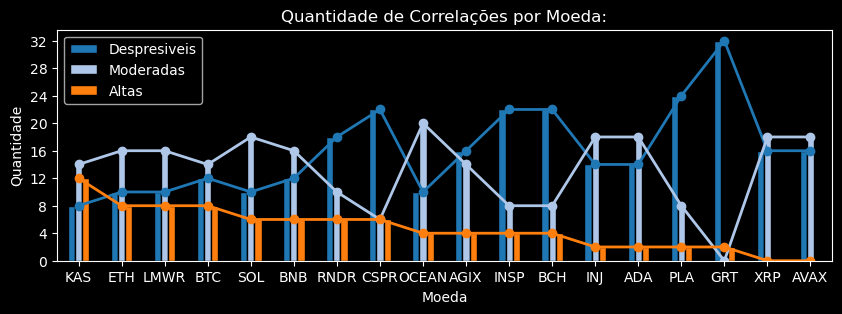

In [24]:
#######################################################################################
# Encontrando pares com correlação maior que 0.8 sem duplicatas
pares_correlacao_alta = []
pares_vistos = set()

for coluna in correlation_table.columns:
    for indice, valor in correlation_table[coluna].items():
        if valor >= 0.8 and valor < 1.0:  # Exclui a correlação perfeita de 1.0
            # Cria uma tupla ordenada para o par, garantindo consistência na ordem
            par_ordenado = tuple(sorted([indice, coluna]))
            
            # Verifica se o par já foi visto
            if par_ordenado not in pares_vistos:
                if indice != coluna:
                    pares_vistos.add(par_ordenado)
                    pares_correlacao_alta.append((coluna, indice, valor))

df_pares_correlacao_alta = pd.DataFrame(pares_correlacao_alta, columns=["Ativo 1", "Ativo 2", "Correlação"])
print("Correlações Mais Altas:")
display(df_pares_correlacao_alta)

#######################################################################################

# Inicializando dicionários para contar os tipos de correlação para cada ativo
contagem_depressiva = {}
contagem_moderada = {}
contagem_alta = {}

for coluna in correlation_table.columns:
    for indice, valor in correlation_table[coluna].items():
        # Ignorando a correlação do ativo com ele mesmo
        if indice != coluna:
            # Contagem de correlações despresiveis
            if -0.5 < valor < 0.5:
                contagem_depressiva[indice] = contagem_depressiva.get(indice, 0) + 1
                contagem_depressiva[coluna] = contagem_depressiva.get(coluna, 0) + 1
            # Contagem de correlações moderadas
            elif 0.5 <= valor < 0.8 or -0.8 < valor <= -0.5:
                contagem_moderada[indice] = contagem_moderada.get(indice, 0) + 1
                contagem_moderada[coluna] = contagem_moderada.get(coluna, 0) + 1
            # Contagem de correlações altas
            if valor != 1:
                if valor >= 0.8 or valor <= -0.8:
                    contagem_alta[indice] = contagem_alta.get(indice, 0) + 1
                    contagem_alta[coluna] = contagem_alta.get(coluna, 0) + 1

df_contagem_depressiva = pd.DataFrame(list(contagem_depressiva.items()), columns=["Ativo", "Despresiveis"])
df_contagem_moderada = pd.DataFrame(list(contagem_moderada.items()), columns=["Ativo", "Moderadas"])
df_contagem_alta = pd.DataFrame(list(contagem_alta.items()), columns=["Ativo", "Altas"])
df_contagens = df_contagem_depressiva.merge(df_contagem_moderada, on="Ativo", how="outer").merge(df_contagem_alta, on="Ativo", how="outer").fillna(0)
for coluna in ['Despresiveis','Moderadas','Altas']: df_contagens[coluna] = df_contagens[coluna].astype('int')
df_contagens = df_contagens.sort_values(['Altas', 'Despresiveis'], ascending=[False, True]).reset_index(drop=True)
df_contagens.set_index('Ativo', inplace=True)

print('Quantidade de Correlações por Moeda:')
display(df_contagens)

#######################################################################################
# CRIANDO GRAFICO

# Obtendo o mapa de cores de forma atualizada
from matplotlib import colormaps
from matplotlib.ticker import MaxNLocator
mapa_cores = colormaps.get_cmap('tab20')

# Adicionando o gráfico de barras
ax = df_contagens.plot(kind='bar', figsize=(10, 3), 
                  color=[mapa_cores.colors[i] for i in range(len(df_contagens.columns))], 
                  edgecolor='black')

# Adicionando o gráfico de linha
for i, coluna in enumerate(df_contagens.columns):
    ax.plot(df_contagens.index, df_contagens[coluna], color=mapa_cores.colors[i], marker='o', linestyle='-', linewidth=2)

plt.xticks(rotation=0)
plt.xlabel('Moeda')
plt.ylabel('Quantidade')
plt.title('Quantidade de Correlações por Moeda:')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [25]:
# ANALISANDO OS MESMOS DADOS LADO A LADO
def norm_pad(df):
    coluna = 'Close'
    df['Close_padronizada'] = (df[coluna] - df[coluna].mean()) / df[coluna].std()
    df['Close_normalizada'] = (df[coluna] - df[coluna].min()) / (df[coluna].max() - df[coluna].min())

for i in cryptos:
    norm_pad(i)

#######################################################################################    

def plot_price_joints(dataframe, moeda, line_color='blue'):
    plt.plot(dataframe.index, dataframe['Close_normalizada'], label=moeda, color=line_color)  # Aplica a cor da linha
    plt.ylabel('Preço de Fechamento (USD)')
    
    # Configurar o formato do eixo x para mostrar os meses
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m\n%Y'))  # Formato do ano e mês
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Intervalo de 1 mês

    plt.legend(fontsize=15)  # Aumentar o tamanho da legenda
    plt.grid(True, color='gray')
    plt.xticks(rotation=0)  # Rotaciona as datas para melhor visualização
    #plt.tight_layout()  # Ajusta o layout para não cortar elementos

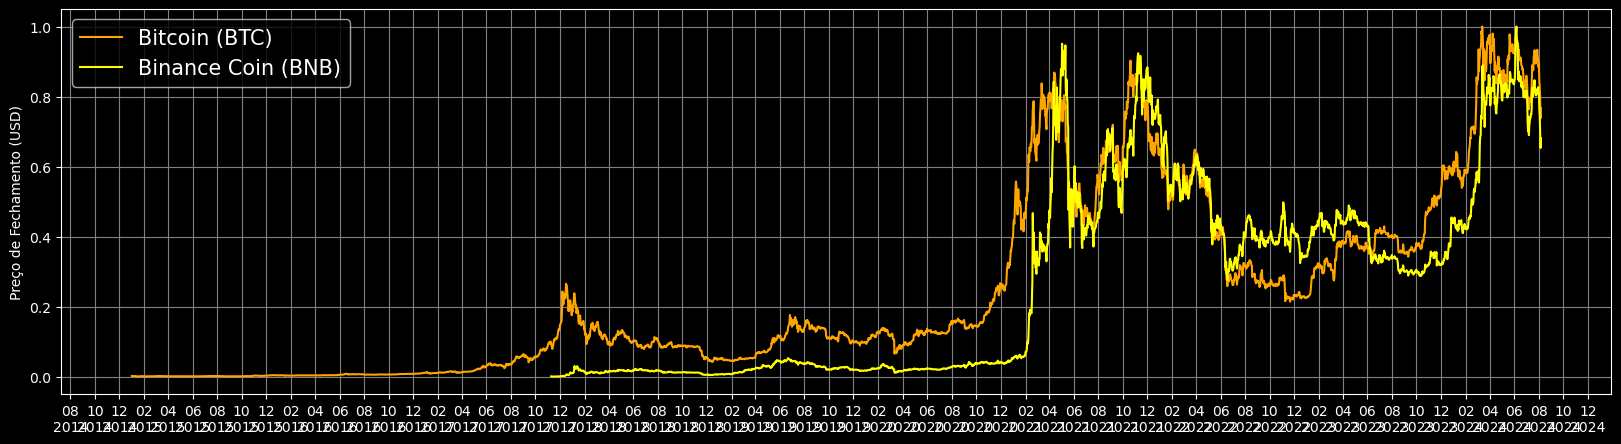

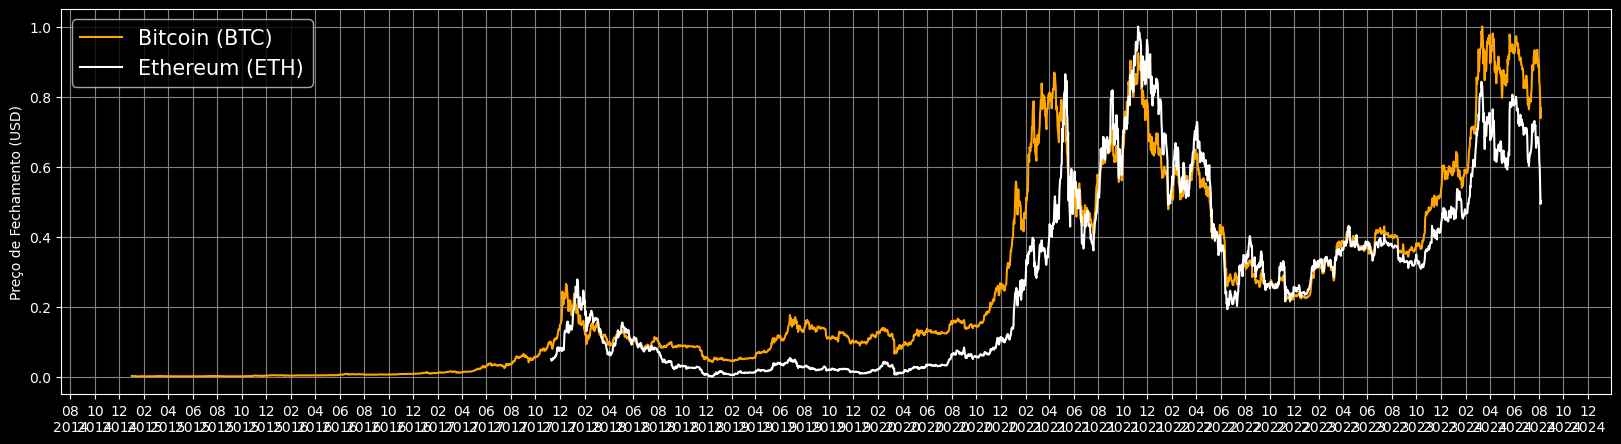

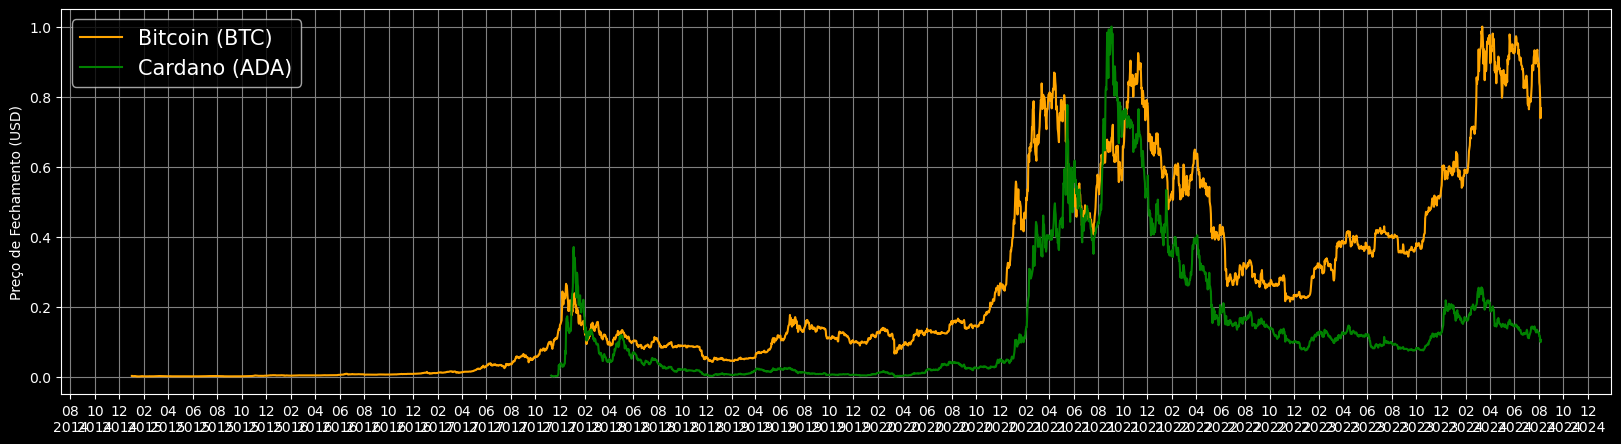

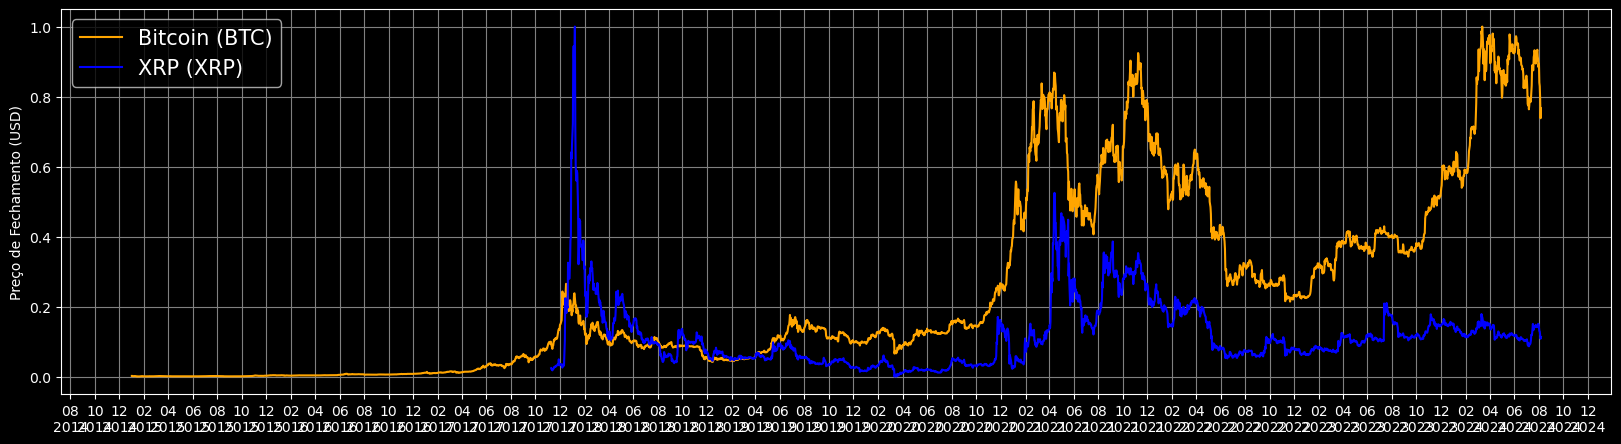

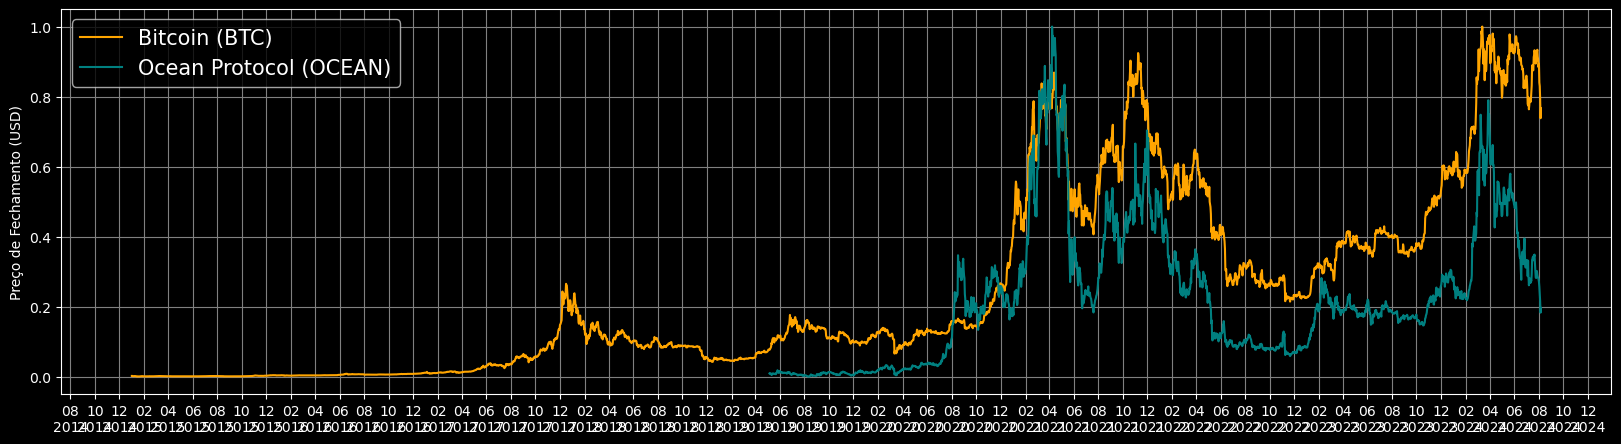

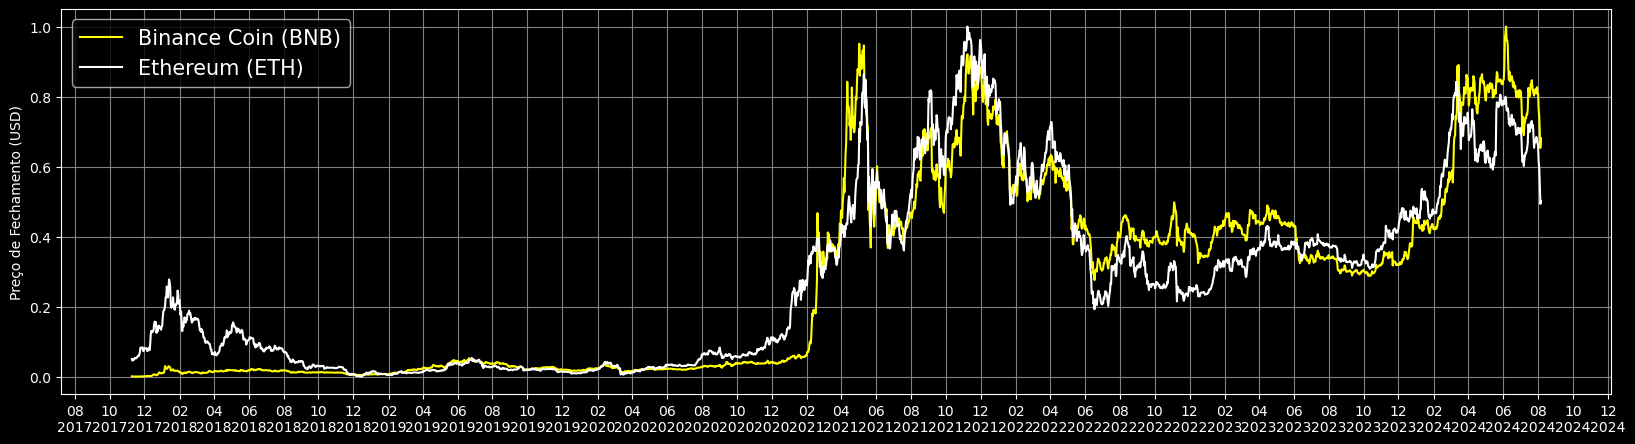

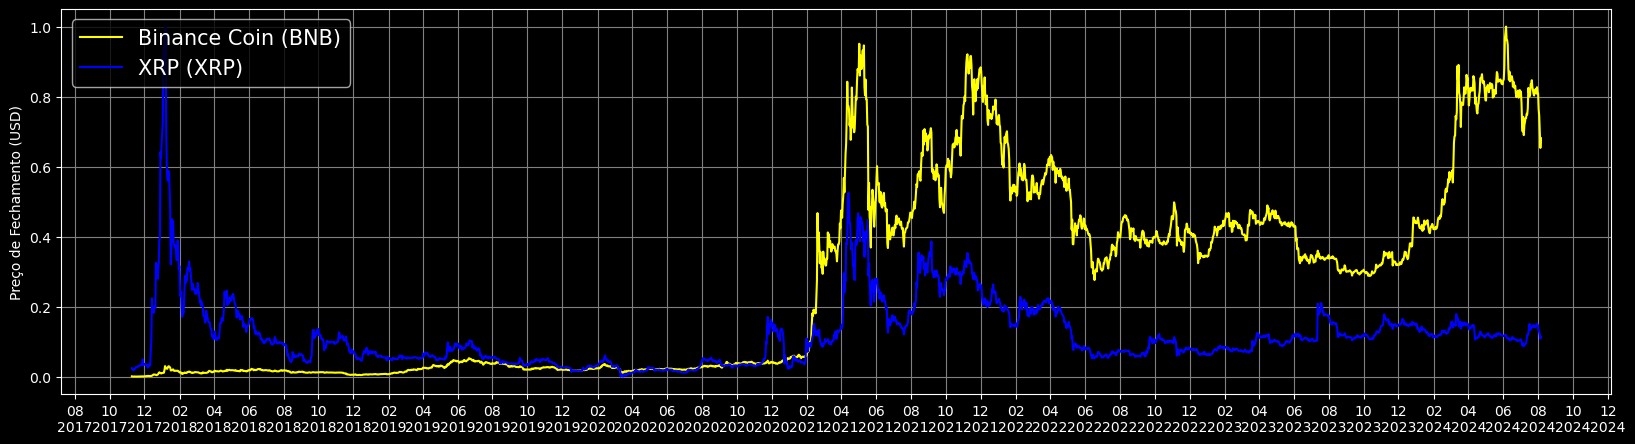

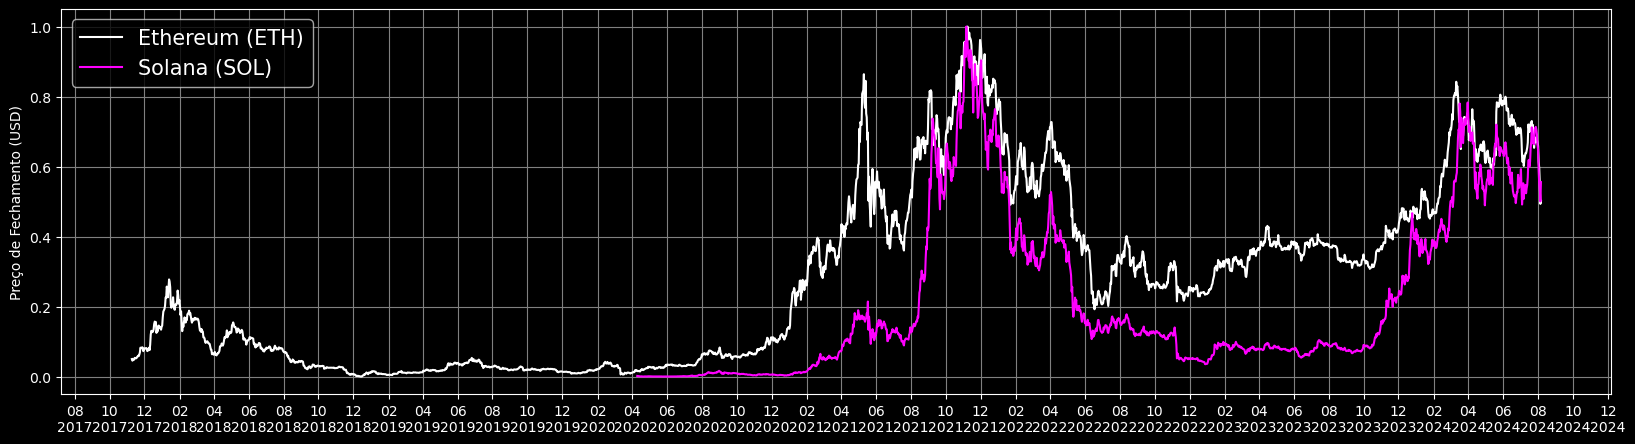

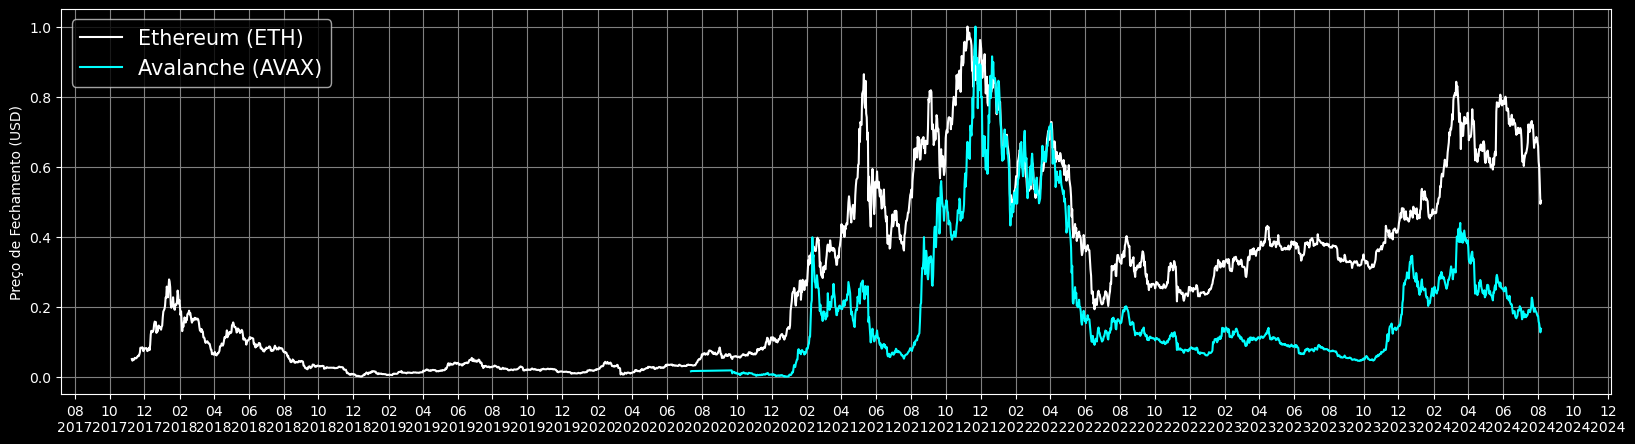

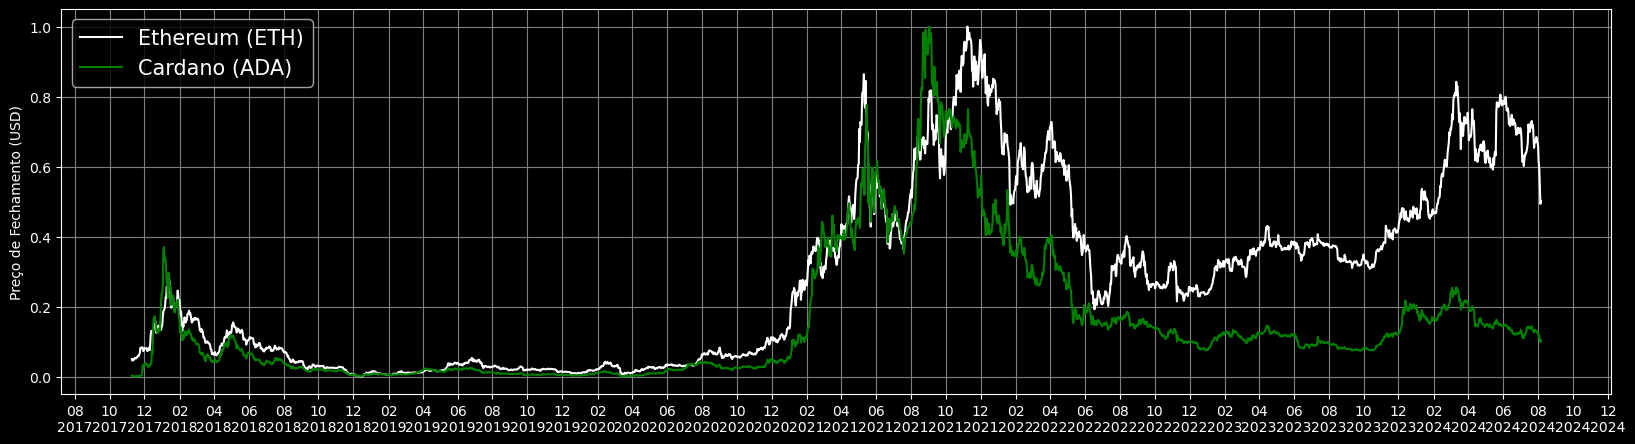

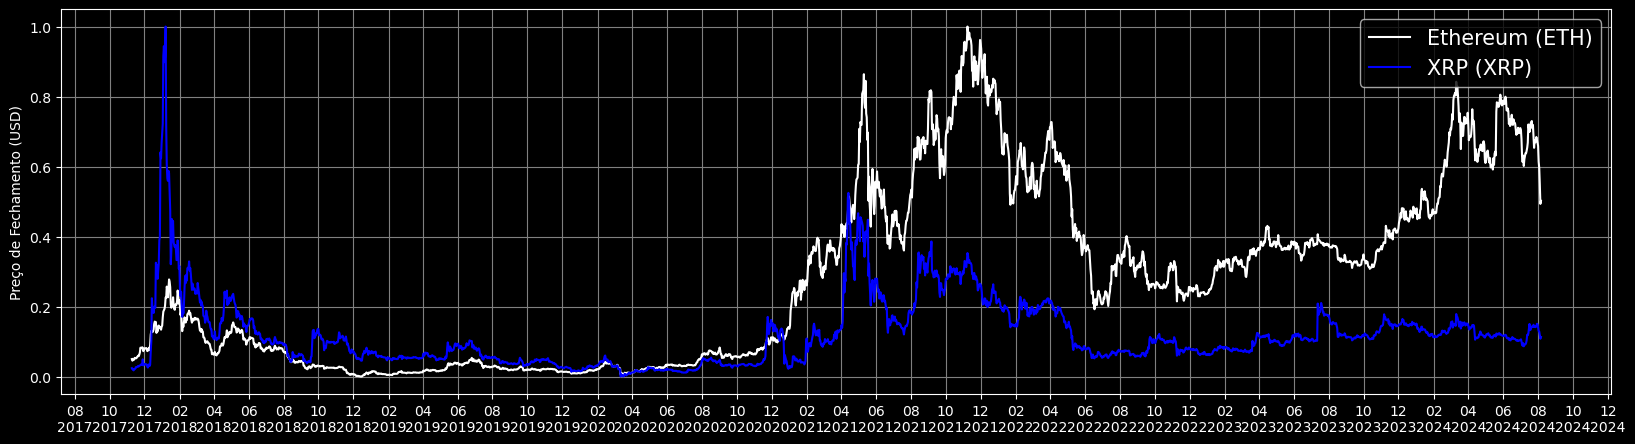

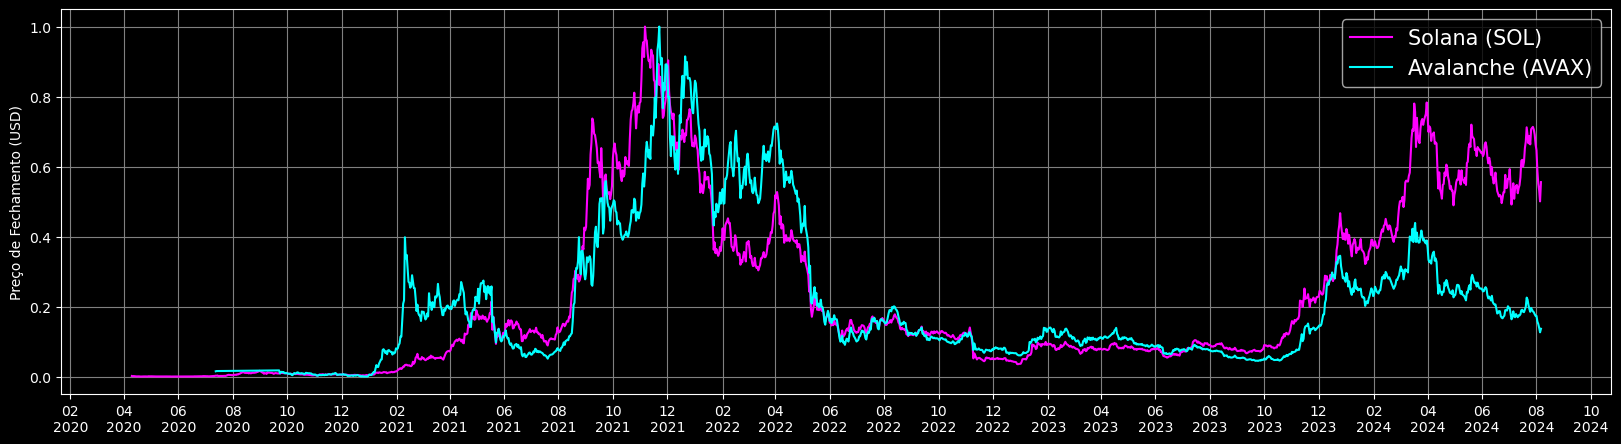

In [31]:
plt.figure(figsize=(20, 5))
plot_price_joints(BTC, moeda='Bitcoin (BTC)', line_color='orange')
plot_price_joints(BNB, moeda='Binance Coin (BNB)', line_color='yellow')
plt.show()

plt.figure(figsize=(20, 5))
plot_price_joints(BTC, moeda='Bitcoin (BTC)', line_color='orange')
plot_price_joints(ETH, moeda='Ethereum (ETH)', line_color='white')
plt.show()

plt.figure(figsize=(20, 5))
plot_price_joints(BTC, moeda='Bitcoin (BTC)', line_color='orange')
plot_price_joints(ADA, moeda='Cardano (ADA)', line_color='green')
plt.show()

plt.figure(figsize=(20, 5))
plot_price_joints(BTC, moeda='Bitcoin (BTC)', line_color='orange')
plot_price_joints(XRP, moeda='XRP (XRP)', line_color='blue')
plt.show()

plt.figure(figsize=(20, 5))
plot_price_joints(BTC, moeda='Bitcoin (BTC)', line_color='orange')
plot_price_joints(OCEAN, moeda='Ocean Protocol (OCEAN)', line_color='teal')
plt.show()

plt.figure(figsize=(20, 5))
plot_price_joints(BNB, moeda='Binance Coin (BNB)', line_color='yellow')
plot_price_joints(ETH, moeda='Ethereum (ETH)', line_color='white')
plt.show()

plt.figure(figsize=(20, 5))
plot_price_joints(BNB, moeda='Binance Coin (BNB)', line_color='yellow')
plot_price_joints(XRP, moeda='XRP (XRP)', line_color='blue')
plt.show()

plt.figure(figsize=(20, 5))
plot_price_joints(ETH, moeda='Ethereum (ETH)', line_color='white')
plot_price_joints(SOL, moeda='Solana (SOL)', line_color='magenta')
plt.show()

plt.figure(figsize=(20, 5))
plot_price_joints(ETH, moeda='Ethereum (ETH)', line_color='white')
plot_price_joints(AVAX, moeda='Avalanche (AVAX)', line_color='cyan')
plt.show()

plt.figure(figsize=(20, 5))
plot_price_joints(ETH, moeda='Ethereum (ETH)', line_color='white')
plot_price_joints(ADA, moeda='Cardano (ADA)', line_color='green')
plt.show()

plt.figure(figsize=(20, 5))
plot_price_joints(ETH, moeda='Ethereum (ETH)', line_color='white')
plot_price_joints(XRP, moeda='XRP (XRP)', line_color='blue')
plt.show()

plt.figure(figsize=(20, 5))
plot_price_joints(SOL, moeda='Solana (SOL)', line_color='magenta')
plot_price_joints(AVAX, moeda='Avalanche (AVAX)', line_color='cyan')
plt.show()

# ANALISE DOS ÍNDICES DO MERCADO FINANCEIRO

In [27]:
# Lista de símbolos dos índices de mercado no Yahoo Finance
indices = {
    "^GSPC": "S&P 500", #Standard & Poor’s 500
    "^DJI": "Dow Jones Industrial Average",
    "^IXIC": "NASDAQ Composite",
    "^FTSE": "FTSE 100",
    "^GDAXI": "DAX", #Deutscher Aktienindex
    "^N225": "Nikkei 225",
    "000001.SS": "Shanghai Composite Index",
    "^FCHI": "CAC 40"
}

# Dicionário para armazenar os DataFrames
indices_dfs = {}

# Carregar dados e criar um DataFrame separado para cada índice de mercado
for symbol, name in indices.items():
    data = yf.download(symbol, start="2020-01-01", end=str(date.today()) )
    indices_dfs[name] = data
    
################################################################################################

GSPC = indices_dfs["S&P 500"]
DJI = indices_dfs["Dow Jones Industrial Average"]
IXIC = indices_dfs["NASDAQ Composite"]
FTSE = indices_dfs["FTSE 100"]
GDAXI = indices_dfs["DAX"]
N225 = indices_dfs["Nikkei 225"]
SCI = indices_dfs["Shanghai Composite Index"]
FCHI = indices_dfs["CAC 40"]

indices = [GSPC, DJI, IXIC, FTSE, GDAXI, N225, SCI, FCHI]
indice_names = ["S&P 500", "Dow Jones Industrial Average", "NASDAQ Composite", "FTSE 100", 
                "DAX", "Nikkei 225", "Shanghai Composite Index", "CAC 40"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


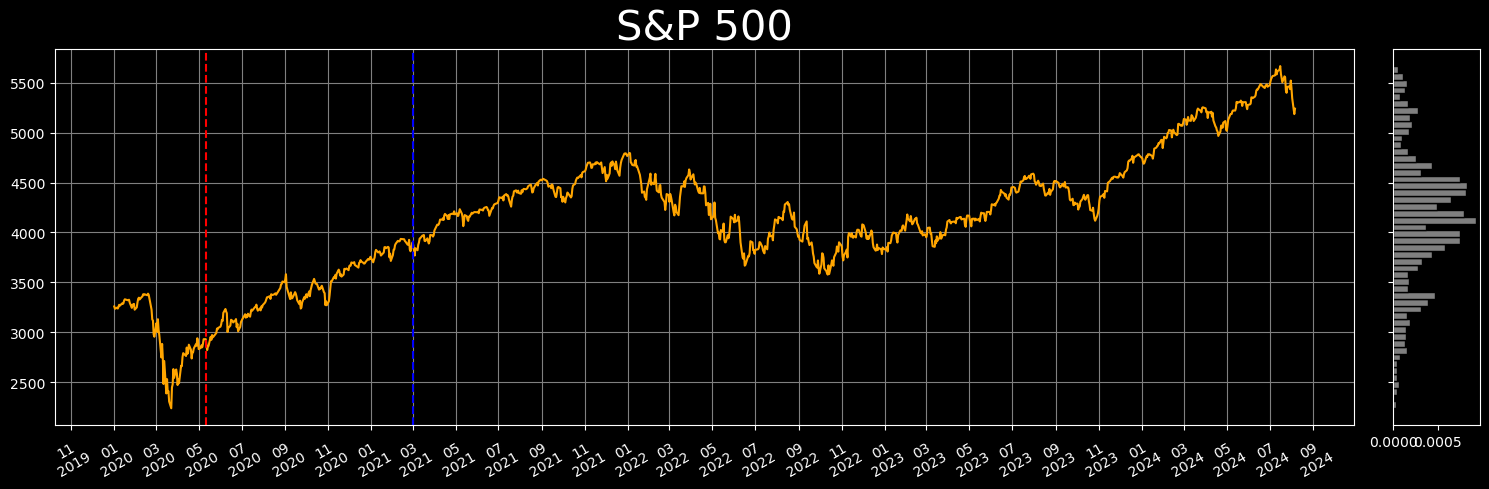

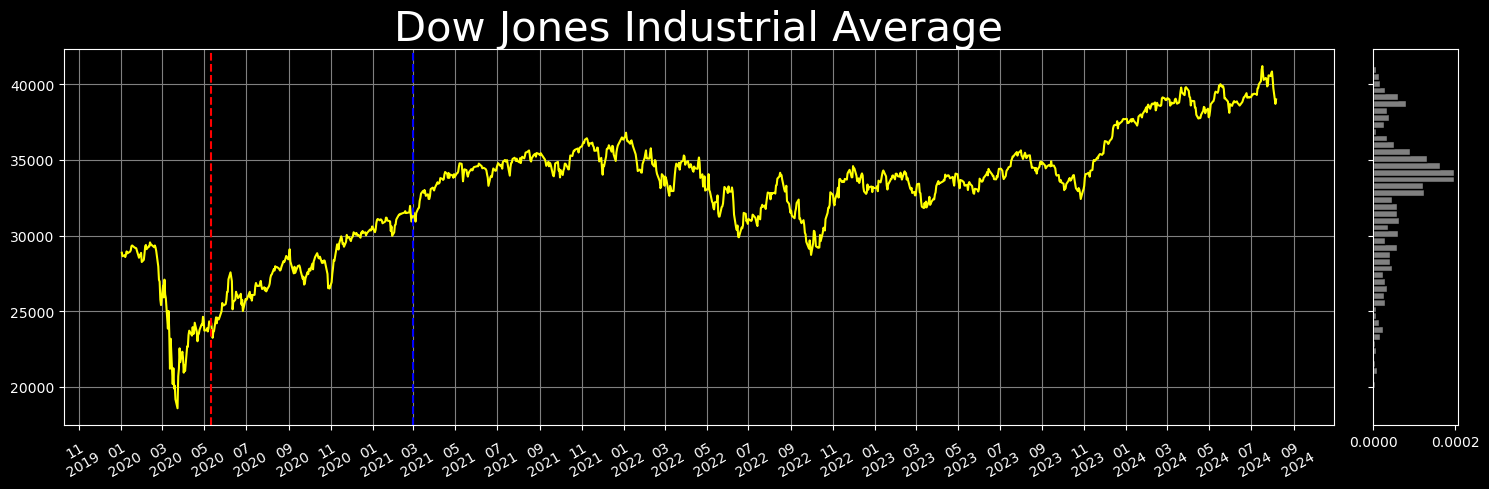

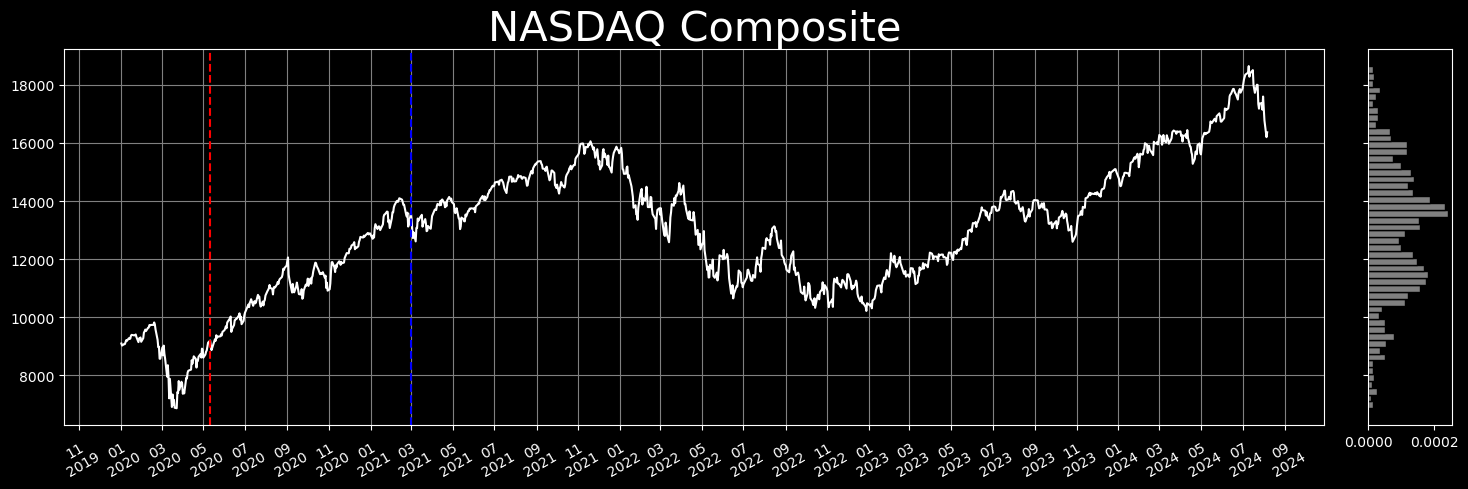

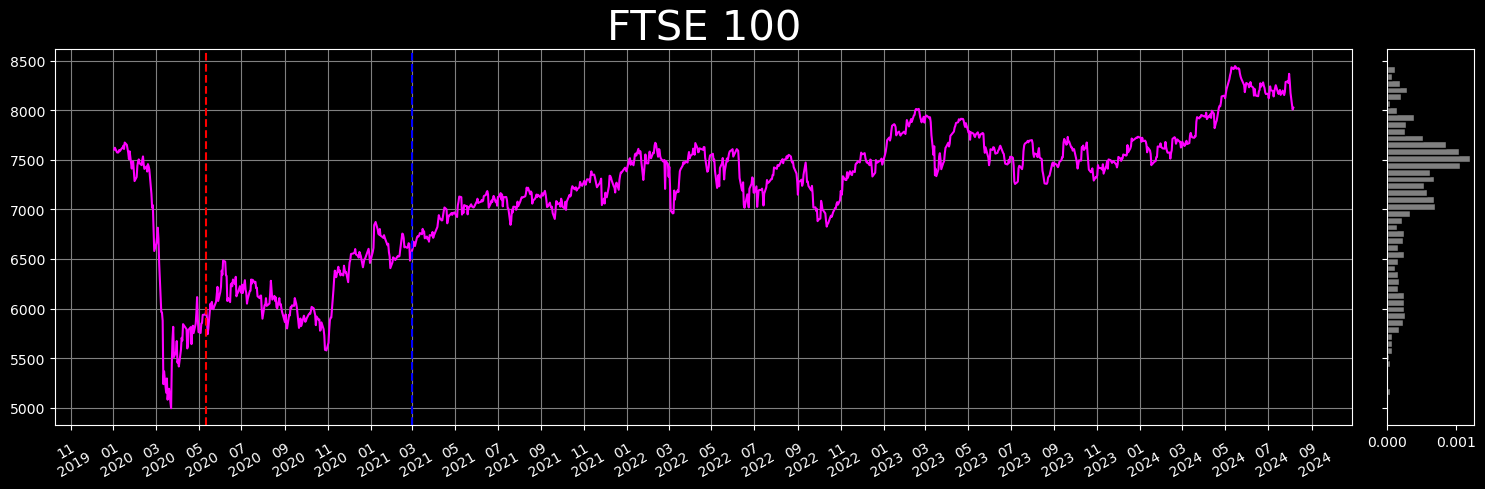

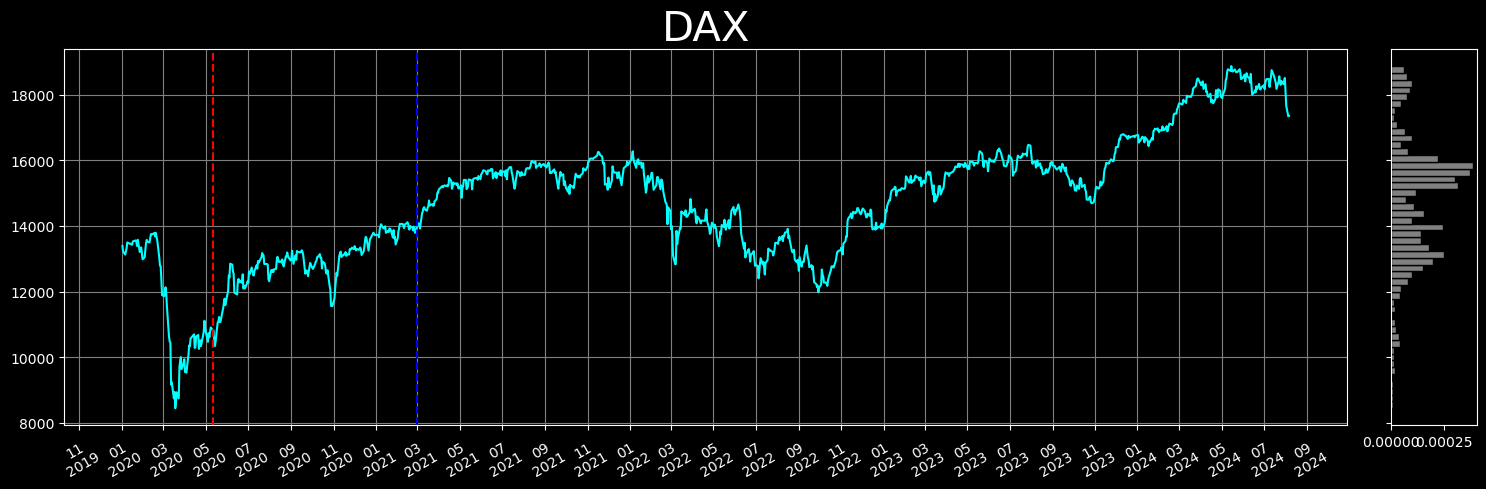

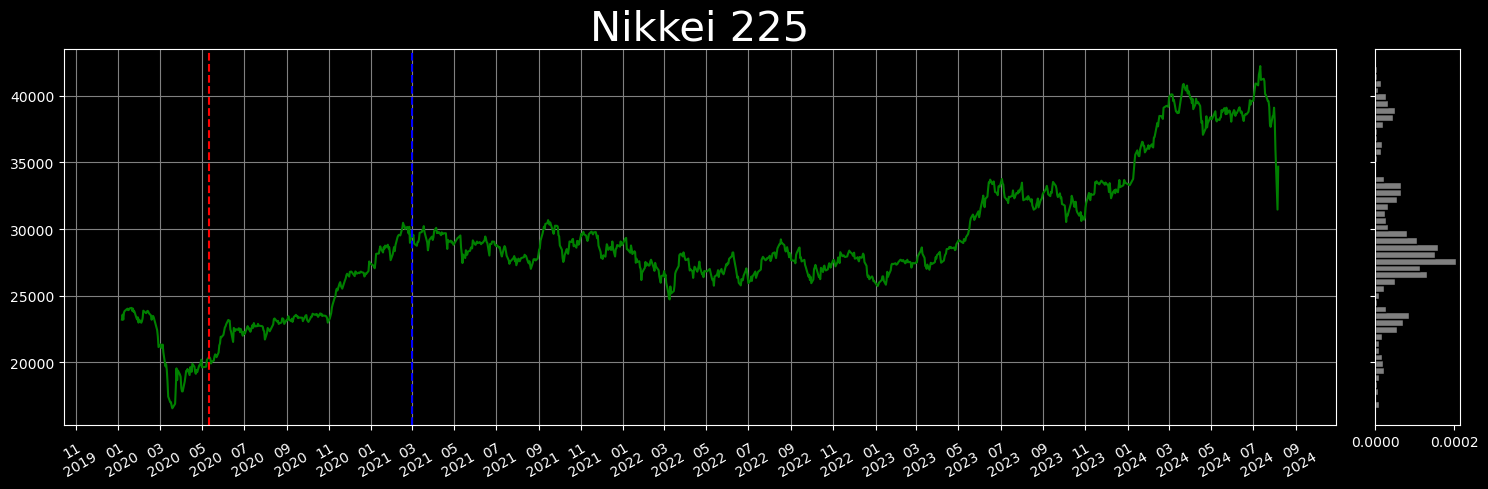

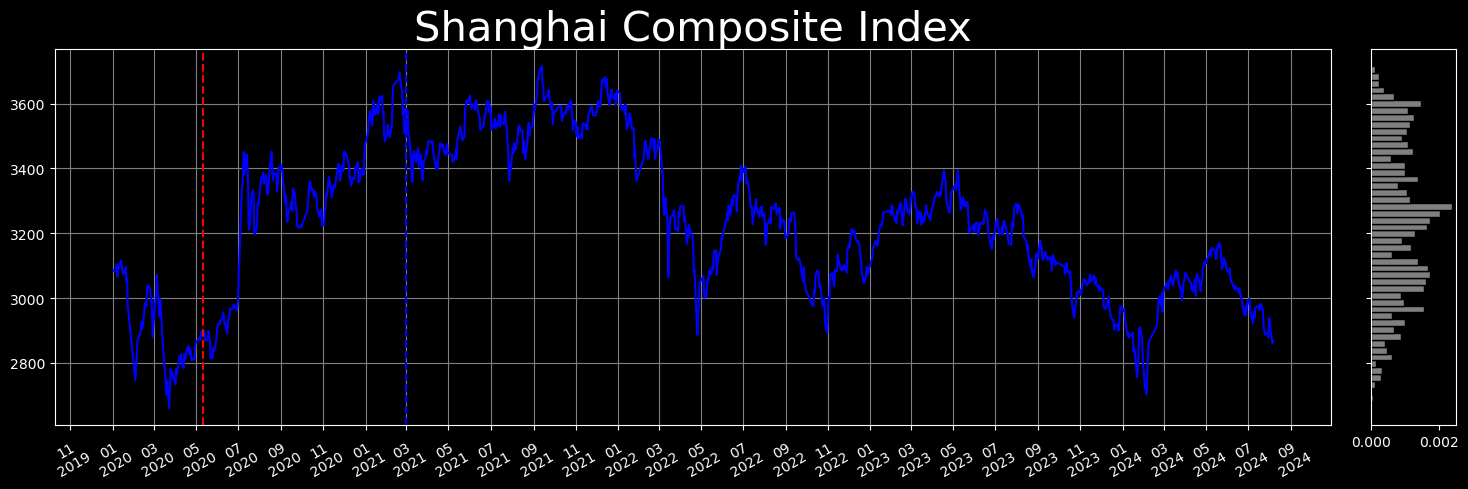

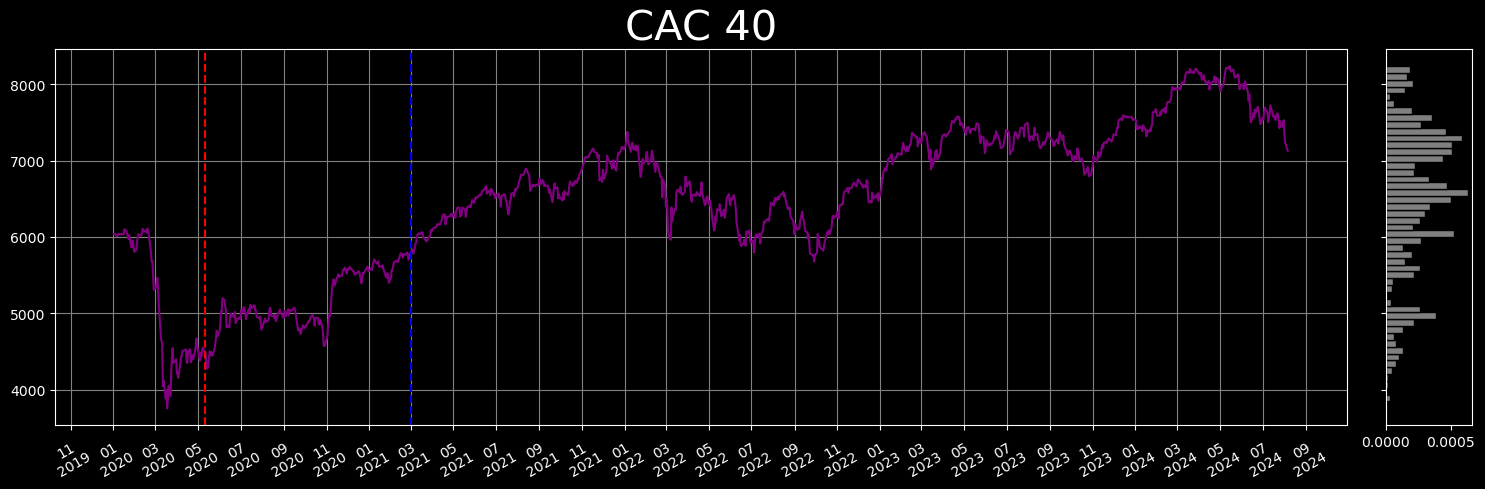

In [28]:
plot_price(GSPC, moeda="S&P 500", line_color='orange')
plot_price(DJI, moeda="Dow Jones Industrial Average", line_color='yellow')
plot_price(IXIC, moeda="NASDAQ Composite", line_color='white')
plot_price(FTSE, moeda="FTSE 100", line_color='magenta')
plot_price(GDAXI, moeda="DAX", line_color='cyan')
plot_price(N225, moeda="Nikkei 225", line_color='green')
plot_price(SCI, moeda="Shanghai Composite Index", line_color='blue')
plot_price(FCHI, moeda="CAC 40", line_color='purple')

# ANALISE CRIPTOS VS ÍNDICES DE MERCADO

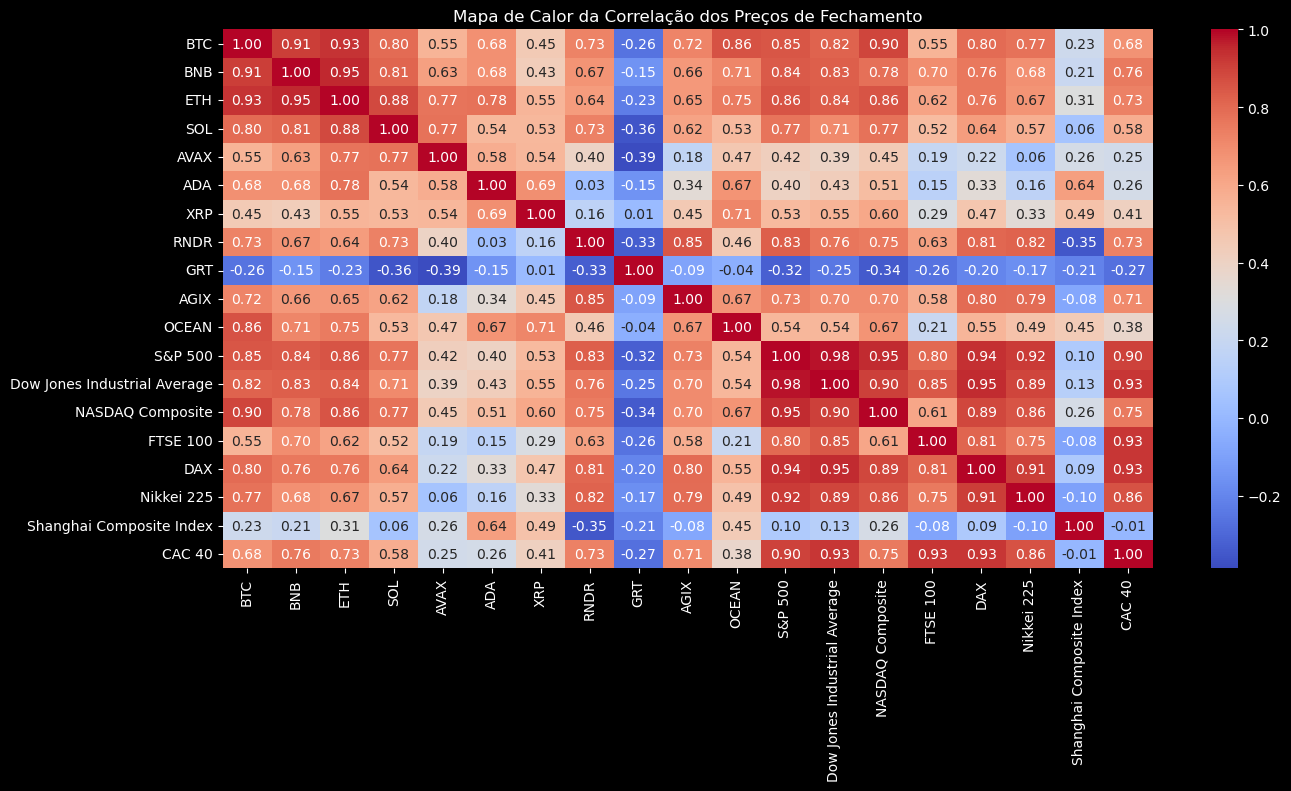

In [29]:
################################################################################################
# MEDINDO O GRAU DE CORRELAÇÃO ENTRE AS MOEDAS E INDICES

medidas = [BTC, BNB, ETH, SOL, AVAX, ADA, XRP, RNDR, GRT, AGIX, OCEAN,
           GSPC, DJI, IXIC, FTSE, GDAXI, N225, SCI, FCHI]
names = ["BTC", "BNB", "ETH", "SOL", "AVAX", "ADA", "XRP", "RNDR", "GRT", "AGIX", "OCEAN", # CRIPTOS
                "S&P 500", "Dow Jones Industrial Average", "NASDAQ Composite", "FTSE 100", # ÍNDICES
                "DAX", "Nikkei 225", "Shanghai Composite Index", "CAC 40"] # ÍNDICES

correlation_table = pd.DataFrame(index=names, columns=names)

# Calcular a correlação entre cada par
for i, df1 in enumerate(medidas):
    for j, df2 in enumerate(medidas):
        correlation_table.iloc[i, j] = calcular_correlacao(df1, df2)

#correlation_table

################################################################################################

# REPRESENTAÇÃO GRAFICA 
# Usar Seaborn para criar o mapa de calor
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_table.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação dos Preços de Fechamento')
plt.show()

In [30]:
STOP

NameError: name 'STOP' is not defined

# Referencias:
- https://www.flai.com.br/leo-salvi/os-4-graficos-essenciais-para-analise-de-criptomoedas/
- https://github.com/OttoBoop/Analises-do-Mercado-de-Cripto-com-python-/blob/main/Analises%20do%20mercado%20de%20cripto%20com%20python.ipynb